Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>
-   
-   <a href="#" id="rmd-download-source">Download Rmd</a>

# DataFrames - Part 2

[**Download chapter PDF
(.pdf).**](https://drive.usercontent.google.com/u/1/uc?id=1rs3CrdFd_Ilcb5dmL3KL8N6V3n99fOhZ&export=download)

[**Download chapter notebook
(.ipynb).**](https://drive.usercontent.google.com/u/1/uc?id=1vBj8V2sZwU7W3fah8ui6ijyJHwRANBtF&export=download)

[<span style="color: rgb(255, 0, 0);">**Mandatory Lesson Feedback
Survey**</span>](https://docs.google.com/forms/d/e/1FAIpQLSdr0capF7jloJhPH3Pki1B3LZoKOG16poOpuVJ7SL2LkwLHQA/viewform?pli=1)

-   What is bivariate or multivariate analysis?
-   How are bivariate properties of data interpreted?
-   How can a bivariate quantity be explained?
-   When to use a correlation matrix?
-   What are ways to study relationships in data?

-   Practise working with Pandas DataFrames and NumPy arrays.
-   Bivariate analysis of Pandas DataFrame / NumPy array.
-   The Pearson correlation coefficient
    (<span class="math inline">\\PCC\\</span>).
-   Correlation Matrix as an example of bivariate summary statistics.

  

  

  

## Prerequisites

-   Python Arrays
-   Basic statistics, in particular, the [correlation
    coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
-   Pandas DataFrames: import and handling

## Remember

Any dataset associated with this lesson is present in `Data` folder of
your assignment repository, and can also be downloaded using the link
given above in [Summary and Setup](../learners/setup.md) for this
Lesson.

The following cell contains functions that need to be imported, please
execute it before continuing with the Introduction.

``` python
# To import data from a csv file into a Pandas DataFrame
from pandas import read_csv

# To import a dataset from scikit-learn
from sklearn import datasets

# To create figure environments and plots
from matplotlib.pyplot import subplots, show

# Specific numpy functions, description in the main body
from numpy import corrcoef, fill_diagonal, triu_indices, arange
```

## Note

In many online tutorials you can find the following convention when
importing functions:

``` python
import numpy as np
import pandas as pd
```

(or similar). In this case, the whole library is imported and any
function in that library is then available using
e.g. `pd.read_csv(my_file)`

We don’t recommend this as the import of the whole library uses a lot of
working memory (e.g. on the order of 100 MB for NumPy).

## Introduction

In the previous lesson, we obtained some basic data quantifications
using the <span class="kbd">describe</span> function. Each of these
quantities was calculated for individual columns, where each column
contained a different measured variable. However, in data analysis in
general (and in machine learning in particular), one of the main points
of analysis is to try and exploit the presence of information that lies
in relationships *between* variables (i.e. columns in our data).

Quantities that are based on data from two variables are referred to as
**bivariate** measures. Analyses that make use of bivariate (and
potentially higher order) quantities are referred to as bivariate or
more broadly, **multivariate data analyses**.

When we combine uni- and multivariate analyses, we can often obtain a
thorough, comprehensive overview of the basic properties of a dataset.

### **Example: The diabetes dataset**

Using the diabetes dataset (introduced in the Data Handling 1 lesson),
we can begin by looking at the data from three of its columns: The upper
row of the below figure shows three histograms. A histogram is a
summarising plot of the recordings of a single variable. The histograms
of columns with indices 3, 4, and 5 have similar means and variances,
which can be explained by prior normalisation of the data. The shapes
differ, but this does not tell us anything about a relationship between
the measurements.

Before the application of any machine learning methods, its is important
to understand whether there is evidence of any relationships between the
individual variables in a DataFrame. One potential relationships is that
the variables are ‘similar’. One way to check for the similarity between
variables in a dataset, is to create a [scatter
plot](https://en.wikipedia.org/wiki/Scatter_plot). The bottom row of the
figure below contains the three scatter plots between variables used to
create the histograms in the top row.

(Please execute the code in order to generate the figures. We will
describe the scatter plot and its features, later.)

``` python
# Figure Code

diabetes = datasets.load_diabetes()

diabetes_data = diabetes.data

fig, ax = subplots(figsize=(21, 10), ncols=3, nrows=2)

# Histograms
ax[0,0].hist(diabetes_data[:,3], bins=20)
ax[0,0].set_ylabel('Count', fontsize=20)

ax[0,1].hist(diabetes_data[:,4], bins=20)
ax[0,1].set_ylabel('Count', fontsize=20)

ax[0,2].hist(diabetes_data[:,5], bins=20)
ax[0,2].set_ylabel('Count', fontsize=20)

# Scatter plots
ax[1,0].scatter(diabetes_data[:,3], diabetes_data[:,4]);
ax[1,0].set_xlabel('Column 3', fontsize=20)
ax[1,0].set_ylabel('Column 4', fontsize=20)

ax[1,1].scatter(diabetes_data[:,4], diabetes_data[:,5]);
ax[1,1].set_xlabel('Column 4', fontsize=20)
ax[1,1].set_ylabel('Column 5', fontsize=20)

ax[1,2].scatter(diabetes_data[:,5], diabetes_data[:,3]);
ax[1,2].set_xlabel('Column 5', fontsize=20)
ax[1,2].set_ylabel('Column 3', fontsize=20);

show()
```

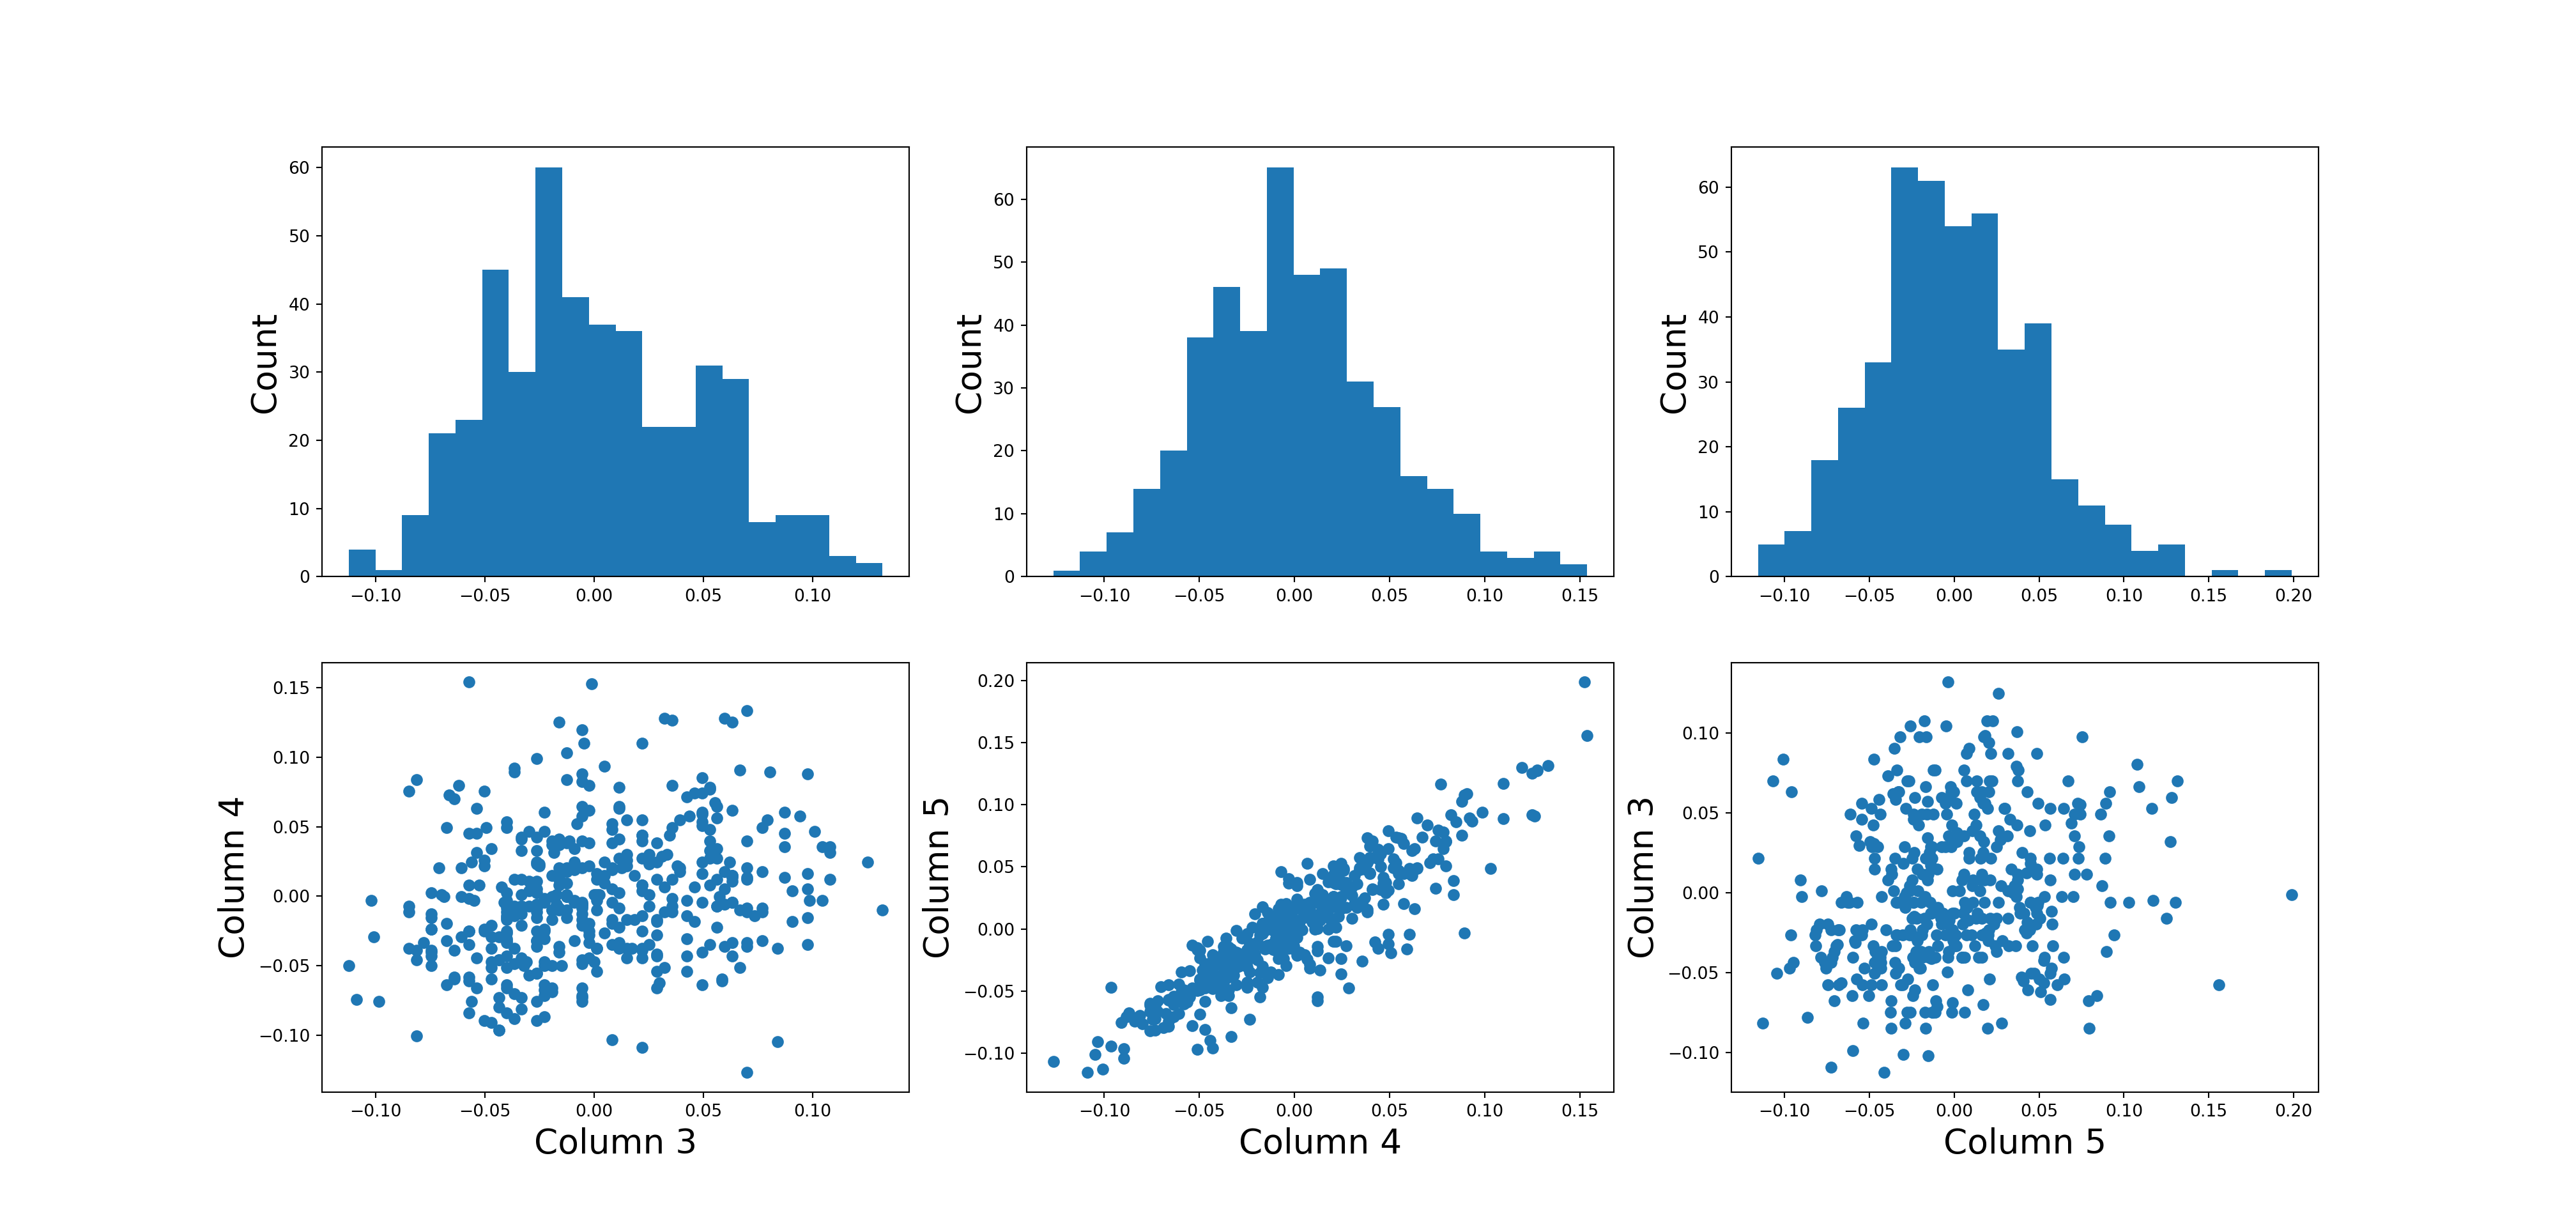

When plotting the data against each other in pairs (as displayed in the
bottom row of the figure), data column 3 plotted against column 4 (left)
and column 5 against 3 (right) both show a fairly uniform circular
distribution of points. This is what would be expected if the data in
the two columns were independent of each other.

In contrast, column 4 against 5 (centre, bottom) shows an elliptical,
pointed shape along the main diagonal. This shows that there is a clear
relationship between these data. Specifically, it indicates that the two
variables recorded in these columns (indices 4 and 5) are *not*
independent of each other. They exhibit more similarity than would be
expected of independent variables.

In this lesson, we aim to obtain an overview of the similarities in a
dataset. We will firstly introduce **bivariate** visualisation using
Matplotlib. We will then go on to demonstrate the use of NumPy functions
in calculating correlation coefficients and obtaining a correlation
matrix, as a means of introducing **multivariate** analysis. Combined
with the basic statistics covered in the previous lesson, we can obtain
a good overview of a high-dimensional dataset, prior to the application
of machine learning algorithms.

## Work-Through: Properties of a Dataset

### **Univariate properties**

For recordings of variables that are contained, for example, in the
columns of a DataFrame, we often assume the independence of samples: the
measurement in one row does not depend on the recording present in
another row. Therefore results of the features obtained under the output
of the <span class="kbd">describe</span> function, for instance, will
not depend on the order of the rows. Also, while the numbers obtained
from different rows can be similar (or even the same) by chance, there
is no way to *predict* the values in one row based on the values of
another.

Contrastingly, when comparing different variables arranged in columns,
this is not necessarily the case. Let us firstly assume that they are
consistent: that all values in a single row are obtained from the same
subject. The values in one column can be related to the numbers in
another column and, specifically, they can show degrees of similarity.
If, for instance, we have a number of subjects investigated (some of
whom have an inflammatory disease and some of whom are healthy controls)
an inflammatory marker might be expected to be elevated in the diseased
subjects. If several markers are recorded from each subject (i.e. more
than one column in the data frame), the values of several inflammatory
markers may be elevated simultaneously in the diseased subjects. Thus,
the profiles of these markers across the whole group will show a certain
similarity.

The goal of multivariate data analysis is to find out whether or not any
relationships exist between recorded variables.

Let us first import a demonstration dataset and check its basic
statistics.

For a work-through example, we can start with the ‘patients’ dataset.
Let’s firstly import the data from the .csv file using the function
<span class="kbd">read_csv</span> from Pandas and load this into a
DataFrame. We can then assess the number of columns and rows using the
<span class="kbd">len</span> function. We can also determine the data
type of each column, which will reveal which columns can be analysed,
quantitatively.

``` python
# Please adjust path according to operating system & personal path to file
df = read_csv('data/patients.csv')

df.head()
print('Number of columns: ', len(df.columns))
print('Number of rows: ', len(df))
df.head()
```

       Age  Height  Weight  Systolic  Diastolic  Smoker  Gender
    0   38      71   176.0     124.0       93.0       1    Male
    1   43      69   163.0     109.0       77.0       0    Male
    2   38      64   131.0     125.0       83.0       0  Female
    3   40      67   133.0     117.0       75.0       0  Female
    4   49      64   119.0     122.0       80.0       0  Female
    Number of columns:  7
    Number of rows:  100
       Age  Height  Weight  Systolic  Diastolic  Smoker  Gender
    0   38      71   176.0     124.0       93.0       1    Male
    1   43      69   163.0     109.0       77.0       0    Male
    2   38      64   131.0     125.0       83.0       0  Female
    3   40      67   133.0     117.0       75.0       0  Female
    4   49      64   119.0     122.0       80.0       0  Female

``` python
print('The columns are of the following data types:')
df.dtypes
```

    The columns are of the following data types:
    Age            int64
    Height         int64
    Weight       float64
    Systolic     float64
    Diastolic    float64
    Smoker         int64
    Gender        object
    dtype: object

Out of the seven columns, three contain integers, three contain
floating-point (decimal) numbers, and the last one contains gender
specification as ‘female’ or ‘male’ - held as string data. The sixth
column in this dataset contains a binary classification, with a value of
‘0’ indicating a non-smoker individual and ‘1’ indicating a smoker.
Numerical analysis can thus be restricted to columns with indices 0 to
4.

## Practice Exercise 1

**Univariate properties of the patients dataset**

1.  Obtain the basic statistical properties of the first five columns
    using the `describe` function.

2.  Plot a bar chart of the means of each column. To access a row by its
    name, you can use the convention `df_describe.loc['name']`.

3.  **Optional:** In the bar chart of the means, try to add the standard
    deviation as an errorbar, using the keyword argument `yerr` in the
    form `yerr = df_describe.loc['std']`.

## Q1

``` python
df = read_csv('data/patients.csv')
df_describe = df.iloc[:, :5].describe()
df_describe.round(2)
```

              Age  Height  Weight  Systolic  Diastolic
    count  100.00  100.00  100.00    100.00     100.00
    mean    38.28   67.07  154.00    122.78      82.96
    std      7.22    2.84   26.57      6.71       6.93
    min     25.00   60.00  111.00    109.00      68.00
    25%     32.00   65.00  130.75    117.75      77.75
    50%     39.00   67.00  142.50    122.00      81.50
    75%     44.00   69.25  180.25    127.25      89.00
    max     50.00   72.00  202.00    138.00      99.00

## Q2

``` python
fig, ax = subplots()
bins = arange(5)
ax.bar(bins, df_describe.loc['min'])
show()
```

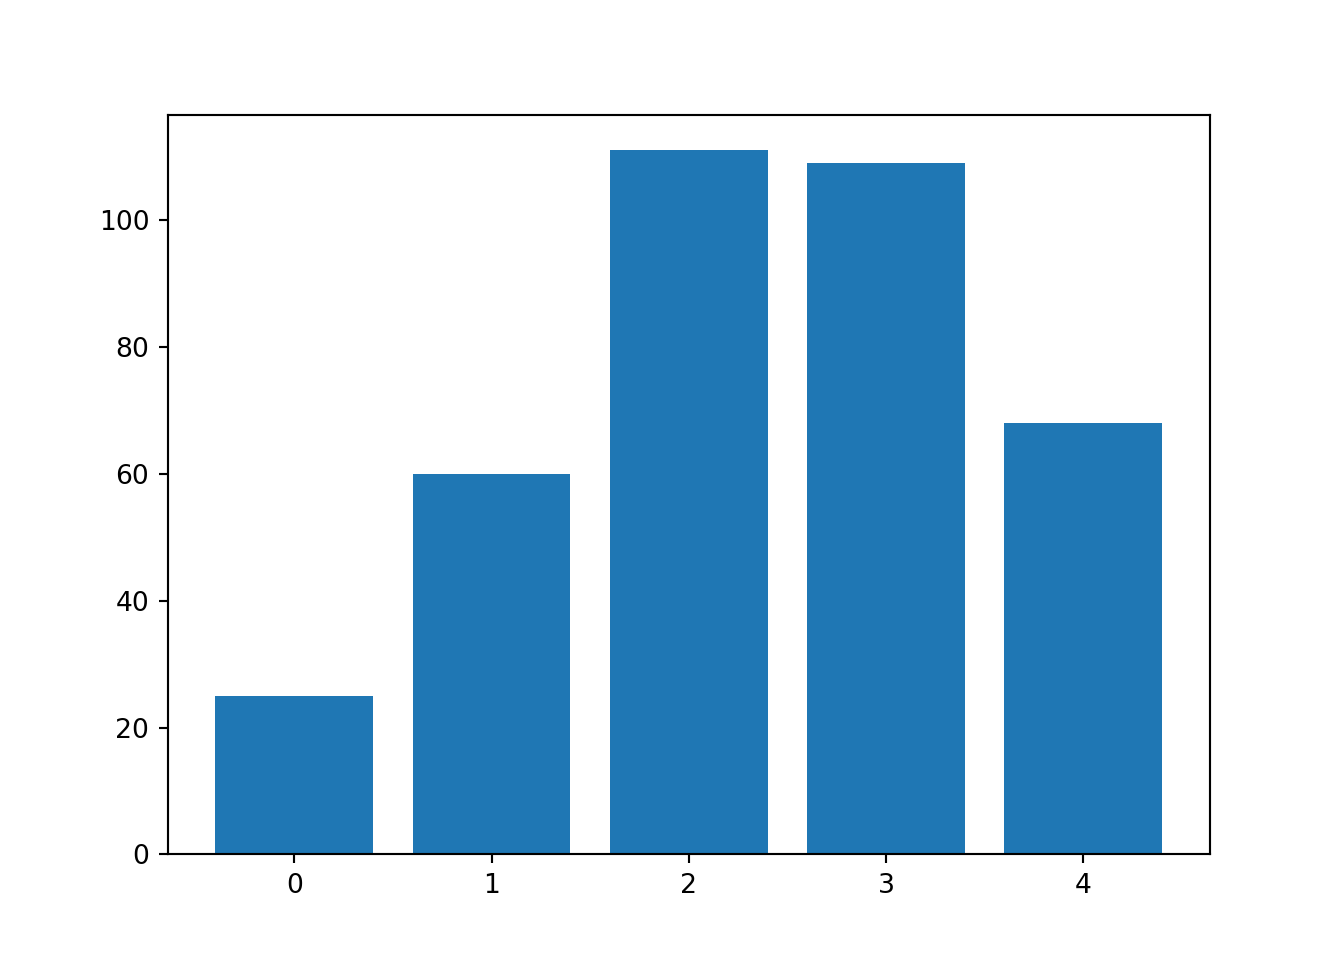

## Q3

``` python
fig, ax = subplots()
bins = arange(5)
ax.bar(bins, df_describe.loc['min'], yerr=df_describe.loc['std'])
ax.set_xticks(bins)
ax.set_xticklabels(df.columns[:5], fontsize=12);
show()
```

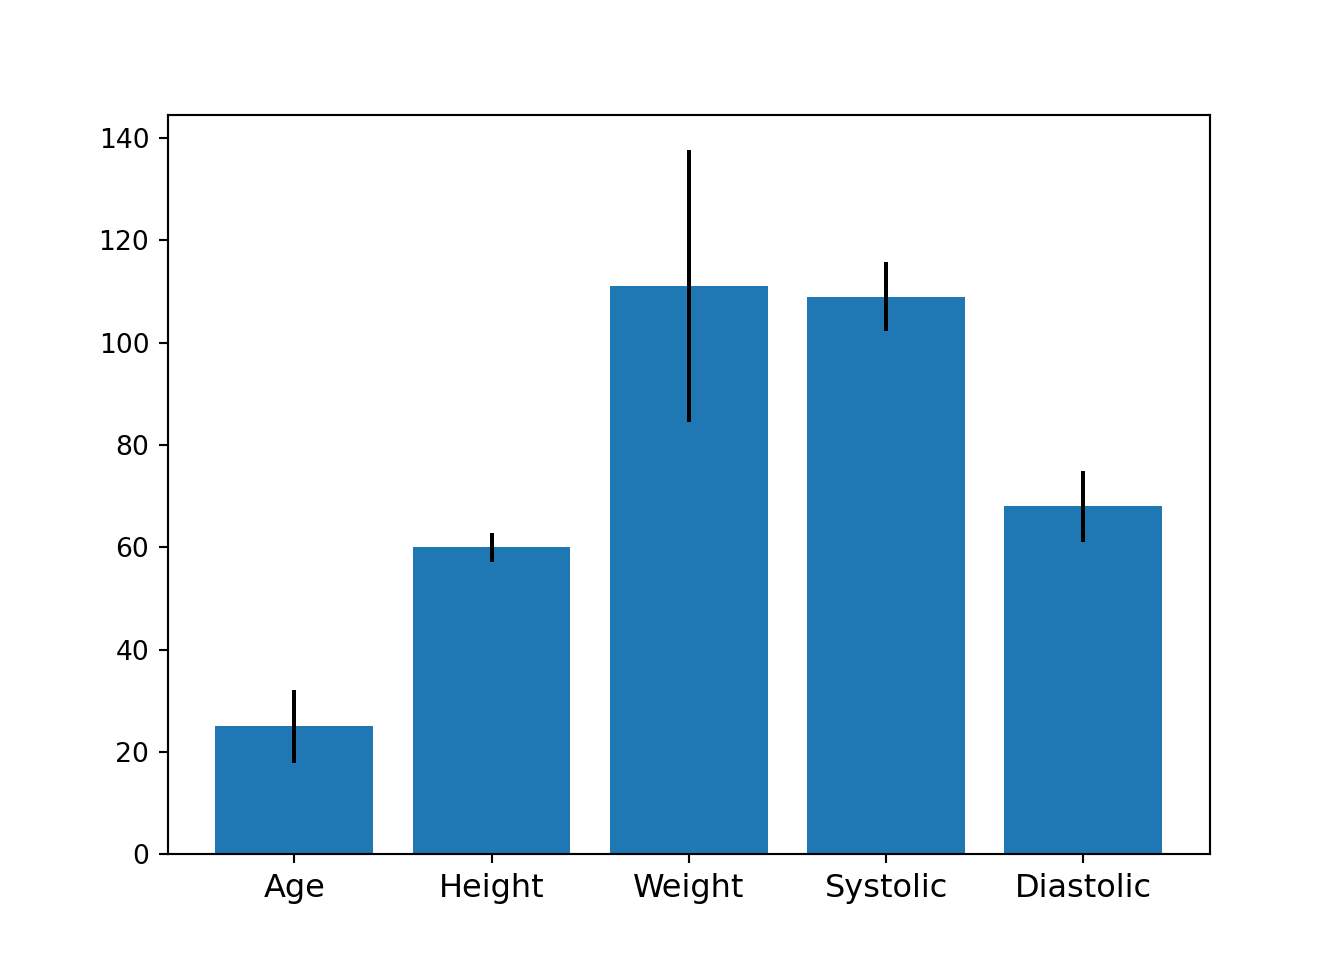

### **Visual Search for Similarity: the Scatter Plot**

In Matplotlib, the function `scatter` allows a user to plot one variable
against another. This is a common way to visually eyeball your data for
relationships between individual columns in a DataFrame.

``` python
# Scatter plot
fig, ax = subplots();

ax.scatter(df['Weight'], df['Height']);
ax.set_xlabel('Weight (pounds)', fontsize=16)
ax.set_ylabel('Height (inches)', fontsize=16)

show()
```

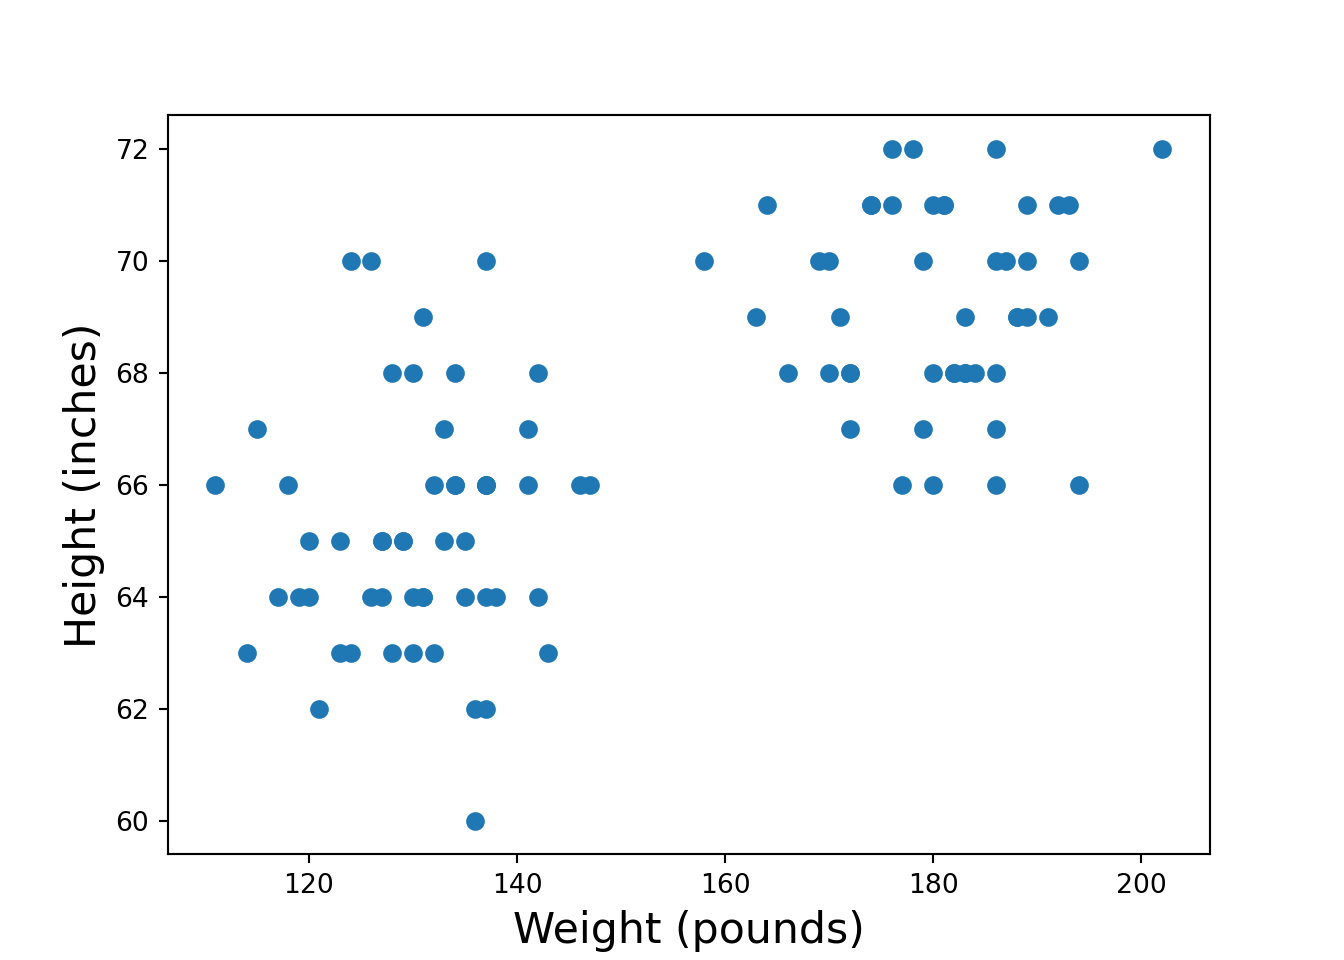

The data points appear to be grouped into two clouds. We will not deal
with this qualitative aspect further, at this point. Grouping will be
discussed in more detail in L2D’s later lessons on Unsupervised Machine
Learning and Clustering.

However, from the information shown on the plot, it is reasonable to
suspect a trend where heavier people are also taller. For instance, we
note that there are no points in the lower right corner of the plot
(weight \>160 pounds and height \< 65 inches).

## \## Practice Exercise 2

**DIY2: Scatter plot from the patients data**

Plot systolic against diastolic blood pressure. Do the two variables
appear to be independent, or related?

Scatter plots are useful for the inspection of select pairs of data.
However, they are only qualitative and thus, it is generally preferred
to have a numerical quantity.

``` python
fig, ax = subplots();
ax.scatter(df['Systolic'], df['Diastolic']);
ax.set_xlabel('Systolic', fontsize=16)
ax.set_ylabel('Diastolic', fontsize=16)

show()
```

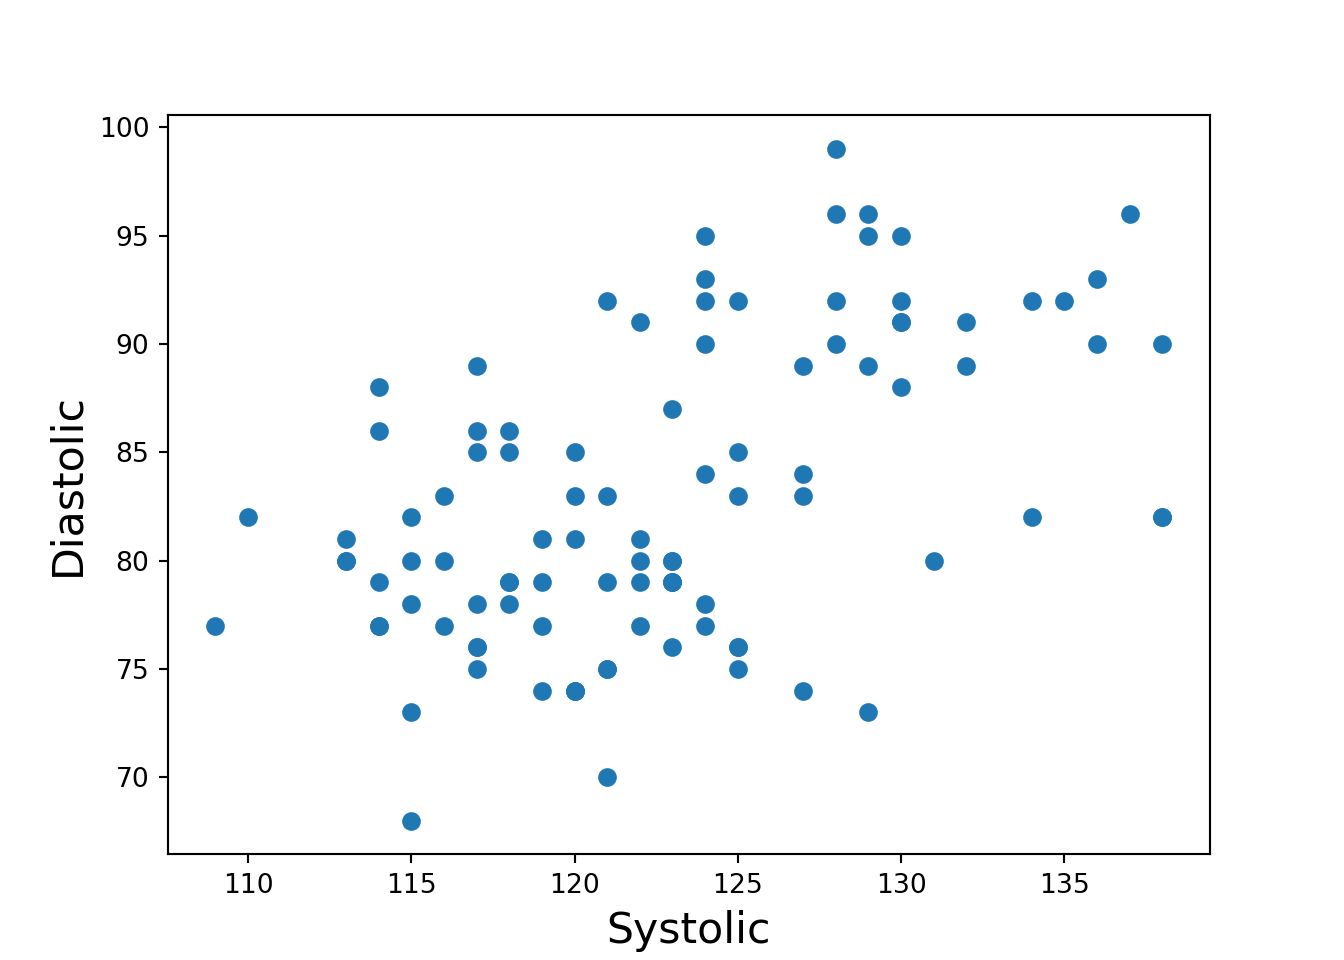

From the plot one might suspect that a larger systolic value is
connected with a larger diastolic value. However, the plot in itself is
not conclusive in that respect.

## The Correlation Coefficient

Bivariate measures are quantities that are calculated from two variables
of data. Bivariate features are the most widely used subset of
multivariate features - all of which require more than one variable in
order to be calculated.

The concept behind many bivariate measures is to quantify “similarity”
between two datasets. If any similarity is observed, it is assumed that
there is a connection or relationship in the data. For variables
exhibiting similarity, knowledge of one understandably leads to an
expectation surrounding the other.

Here we are going to look at a specific bivariate quantity: the [Pearson
correlation
coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
<span class="math inline">\\PCC\\</span>.

The formula for the <span class="math inline">\\PCC\\</span> is set up
such that two identical datasets yield a
<span class="math inline">\\PCC\\</span> of 1. Technically, this is
achieved by normalising all variances to be equal to 1. This also
implies that all data points in a scatter plot of one variable plotted
against itself are aligned along the main diagonal (with a positive
slope).

In two perfectly antisymmetrical datasets, where one variable can be
obtained by multiplying the other by -1, a value of -1 is obtained. This
implies that all data points in a scatter plot are aligned along the
negative, or anti diagonal, (with a negative slope). All other
possibilities lie in between. A value of 0 refers to precisely balanced
positive and negative contributions to the measure. However - strictly
speaking - the latter does not necessarily indicate that there is no
relationship between the variables.

The <span class="math inline">\\PCC\\</span> is an **undirected**
measure. This means that its value for the comparison between dataset 1
and dataset 2 is exactly the same as the
<span class="math inline">\\PCC\\</span> between dataset 2 and dataset
1.

A method to directly calculate the
<span class="math inline">\\PCC\\</span> of two datasets, is to use the
function `corr` and apply this to your DataFrame. For instance, we can
apply it to the Everleys dataset:

``` python
df_everley = read_csv('data/everleys_data.csv')
df_everley.corr()
```

              calcium    sodium
    calcium  1.000000 -0.258001
    sodium  -0.258001  1.000000

The result as a matrix of two-by-two numbers. Along the diagonal (top
left and bottom right) are the values for the comparison of a column to
itself. As any dataset is identical with itself, the values are one by
definition.

The non-diagonal elements indicate that <span class="math inline">\\CC
\approx-0.26\\</span> for the two datasets. Both
<span class="math inline">\\CC(12)\\</span> and
<span class="math inline">\\CC(21)\\</span> are given in the matrix,
however because of the symmetry, we would only need to report one out of
the two.

## Note

In this lesson we introduce how to calculate the
<span class="math inline">\\PCC\\</span> but do not discuss its
significance. For example, interpreting the value above requires
consideration of the fact that we only have only 18 data points.
Specifically, we refrain from concluding that because the
<span class="math inline">\\PCC\\</span> is negative, a high value for
the calcium concentration is associated with a small value for sodium
concentration (relative to their respective means).

One quantitative way to assess whether or not a given value of the
<span class="math inline">\\PCC\\</span> is meaningful or not, is to use
surrogate data. In our example, we could create random numbers in an
array with shape (18, 2), for instance - such that the two means and
standard deviations are the same as in the Everley dataset, but the two
columns are independent of each other. Creating many realisations, we
can check what distribution of <span class="math inline">\\PCC\\</span>
values is expected from the randomly generated data, and compare this
against the values obtained from the Everleys dataset.

Much of what we will cover in the Machine Learning component of L2D will
involve NumPy arrays. Let us, therefore, convert the Everleys dataset
from a Pandas DataFrame into a NumPy array.

``` python
everley_numpy = df_everley.to_numpy()
everley_numpy
```

array(\[\[ 3.4555817 , 112.69098 \], \[ 3.6690263 , 125.66333 \], \[
2.7899104 , 105.82181 \], \[ 2.9399 , 98.172772 \], \[ 5.42606 ,
97.931489 \], \[ 0.71581063, 120.85833 \], \[ 5.6523902 , 112.8715 \],
\[ 3.5713201 , 112.64736 \], \[ 4.3000669 , 132.03172 \], \[ 1.3694191 ,
118.49901 \], \[ 2.550962 , 117.37373 \], \[ 2.8941294 , 134.05239 \],
\[ 3.6649873 , 105.34641 \], \[ 1.3627792 , 123.35949 \], \[ 3.7187978 ,
125.02106 \], \[ 1.8658681 , 112.07542 \], \[ 3.2728091 , 117.58804 \],
\[ 3.9175915 , 101.00987 \]\])

We can see that the numbers remain the same, but the format has changed;
we have lost the names of the columns. Similar to a Pandas DataFrame, we
can also make use of the <span class="kbd">shape</span> function to see
the dimensions of the data array.

``` python
everley_numpy.shape
```

(18, 2)

We can now use the NumPy function <span class="kbd">corrcoef</span> to
calculate the Pearson correlation:

``` python
from numpy import corrcoef

corr_matrix = corrcoef(everley_numpy, rowvar=False)

print(corr_matrix)
```

\[\[ 1. -0.25800058\] \[-0.25800058 1. \]\]

The function <span class="kbd">corrcoef</span> takes a two-dimensional
array as its input. The keyword argument `rowvar` is True by default,
which means that the correlation will be calculated along the rows of
the dataset. As we have the data features contained in the columns, the
value of `rowvar` needs to be set to False. (You can check what happens
if you set it to ‘True’. Instead of a 2x2 matrix for two columns you
will get a 18x18 matrix for eighteen pair comparisons.)

We mentioned that the values of the
<span class="math inline">\\PCC\\</span> are calculated such that they
must lie between -1 and 1. This is achieved by normalisation with the
variance. If, for any reason, we don’t want the similarity calculated
using this normalisation, what results is the so-called **covariance**.
In contrast to the <span class="math inline">\\PCC\\</span>, its values
will depend on the absolute size of the numbers in the data array. From
the NumPy library, we can use the function <span class="kbd">cov</span>
in order to calculate the covariance:

``` python
from numpy import cov

cov_matrix = cov(everley_numpy, rowvar=False)

print(cov_matrix)
```

\[\[ 1.70733842 -3.62631625\] \[ -3.62631625 115.70986192\]\]

The result shows how covariance is strongly dependent on the actual
numerical values in a data column. The two values along the diagonal are
identical with the variances obtained by squaring the standard deviation
(calculated, for example, using the <span class="kbd">describe</span>
function).

## Practice Exercise 3

**Correlations from the patients dataset**

Calculate the Pearson <span class="math inline">\\PCC\\</span> between
the systolic and the diastolic blood pressure from the patients data
using:

1.  The Pandas DataFrame and

2.  The data as a NumPy array.

## Q1

``` python
df = read_csv('data/patients.csv')

df[['Systolic', 'Diastolic']].corr()
```

           Systolic  Diastolic

Systolic 1.000000 0.511843 Diastolic 0.511843 1.000000

## Q2

``` python
df_SysDia_numpy = df[['Systolic', 'Diastolic']].to_numpy()

df_SysDia_corr = corrcoef(df_SysDia_numpy, rowvar=False)

print('Correlation coefficient between Systole and Diastole:', round(df_SysDia_corr[0, 1], 2))
```

    Correlation coefficient between Systole and Diastole: 0.51

It is worth noting that it is equally possible to calculate the
correlation between rows of a two-dimension array (i.e. `rowvar=True`)
but the interpretation will differ. Imagine a dataset where for two
subjects a large number, call it <span class="math inline">\\N\\</span>,
of metabolites were determined quantitatively (a Metabolomics dataset).
If that dataset is of shape (2, N) then one can calculate the
correlation between the two rows. This would be done to determine the
correlation of the metabolite profiles between the two subjects.

## The Correlation Matrix

If we have more than two columns of data, we can obtain a Pearson
correlation coefficient for each pair. In general, for N columns, we get
<span class="math inline">\\N^2\\</span> pairwise values. We will omit
the correlations of each column relative to itself, of which there are
<span class="math inline">\\N\\</span>, which means we are left with
<span class="math inline">\\N\*(N-1)\\</span> pairs. Since each value
appears twice, due to the symmetry of the calculation, we can ignore
half of them, leaving us with <span class="math inline">\\N\*(N-1) /
2\\</span> coefficients for <span class="math inline">\\N\\</span>
columns.

Here is an example using the ‘patients’ data:

``` python
df = read_csv('data/patients.csv')

df.corr()
```

ValueError: could not convert string to float: ‘Male’

If we do the calculation with the Pandas DataFrame, the ‘Gender’ is
automatically ignored and, by default, we get
<span class="math inline">\\6\*5/2=15\\</span> coefficients for the
remaining six columns. Note that the values that involves the ‘Smoker’
column are meaningless, since they represent a True/False-like binary.

Let us now convert the DataFrame into a NumPy array, and check its
shape:

``` python
patients_numpy = df.to_numpy()
patients_numpy.shape
```

(100, 7)

Next, we can try to calculate the correlation matrix for the first five
columns of this data array. If we do this directly to the array, we get
an AttributeError: ‘float’ object has no attribute ‘shape’.

This is amended by converting the array to a floating point prior to
using the <span class="kbd">corrcoef</span> function. For this, we can
convert the data type using the method `astype(float)`:

``` python
cols = 5

patients_numpy_float = patients_numpy[:, :cols].astype(float)

patients_corr = corrcoef(patients_numpy_float, rowvar=False)

patients_corr
```

array(\[\[1. , 0.11600246, 0.09135615, 0.13412699, 0.08059714\],
\[0.11600246, 1. , 0.6959697 , 0.21407555, 0.15681869\], \[0.09135615,
0.6959697 , 1. , 0.15578811, 0.22268743\], \[0.13412699, 0.21407555,
0.15578811, 1. , 0.51184337\], \[0.08059714, 0.15681869, 0.22268743,
0.51184337, 1. \]\])

The result is called the **correlation matrix**. It contains all the
bivariate comparisons possible for the five chosen columns.

In the calculation above, we used the
<span class="math inline">\\PCC\\</span> in order to calculate the
matrix. In general, any bivariate measure can be used to obtain a matrix
of the same shape.

### **Heatmaps in Matplotlib**

To get an illustration of the correlation pattern in a dataset, we can
plot the correlation matrix as a heatmap.

Below are three lines of code, that make use of functionality within
`Matplotlib`, to plot a heatmap of the correlation matrix from the
‘patients’ dataset. We make use of the function
<span class="kbd">imshow</span>:

``` python
fig, ax = subplots(figsize=(5,5))

im = ax.imshow(patients_corr, cmap='coolwarm');

show()
```

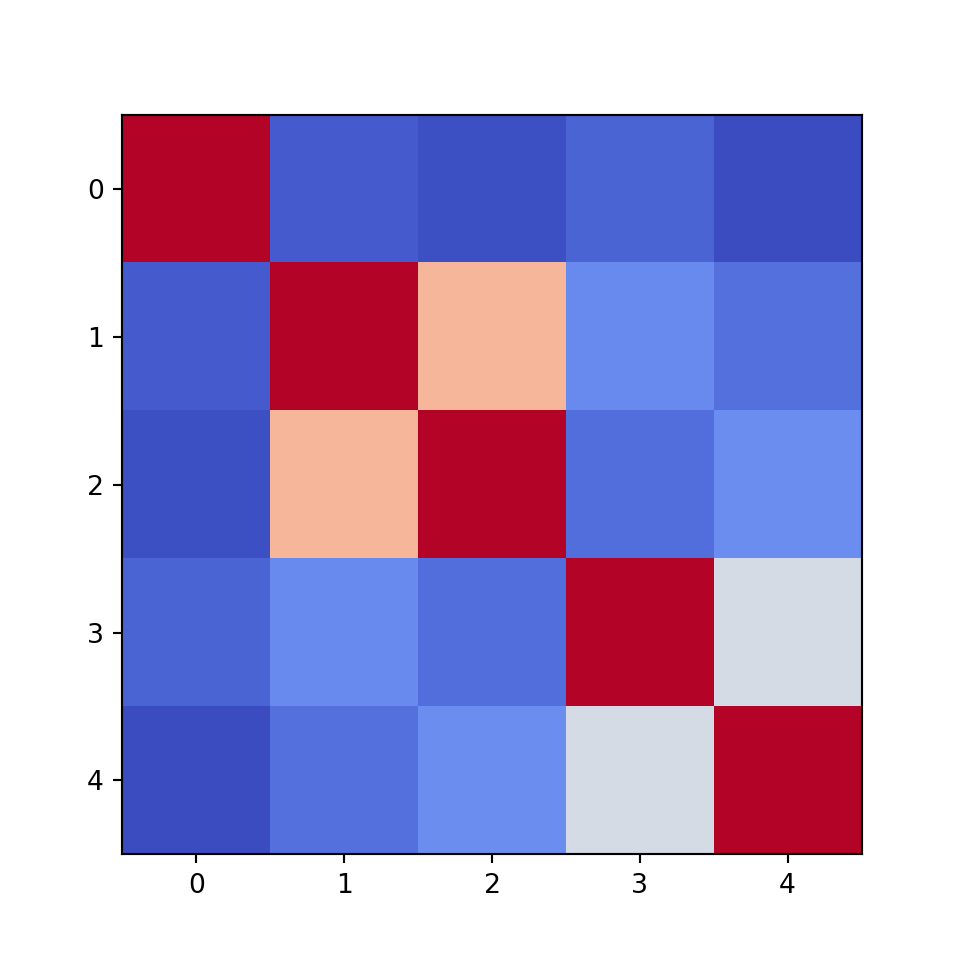

Note: we have specified the colour map `coolwarm`, using the keyword
argument `cmap`. For a list of `Matplotlib` colour maps, please refer to
the [gallery in the
documentation](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html).
The names to use in the code are on the left hand side of the colour
bar.

Let us add two more features to improve this figure.

Firstly, in order to highlight true correlations stand out (rather than
the trivial self-correlations along the diagonal, which are always equal
to 1) we can deliberately set the diagonal as being equal to 0. To
achieve this, we use the NumPy function
<span class="kbd">fill_diagonal</span>.

Secondly, the <span class="kbd">imshow</span> function, by default, will
scale the colours to the minimum and maximum values present in the
array. As such, we do not know what red or blue means. To see the colour
bar, it can be added to the figure environment ‘fig’ using `colorbar`.

``` python
from numpy import fill_diagonal

fill_diagonal(patients_corr, 0)

fig, ax = subplots(figsize=(7,7))

im = ax.imshow(patients_corr, cmap='coolwarm');

fig.colorbar(im, orientation='horizontal', shrink=0.7);

show()
```

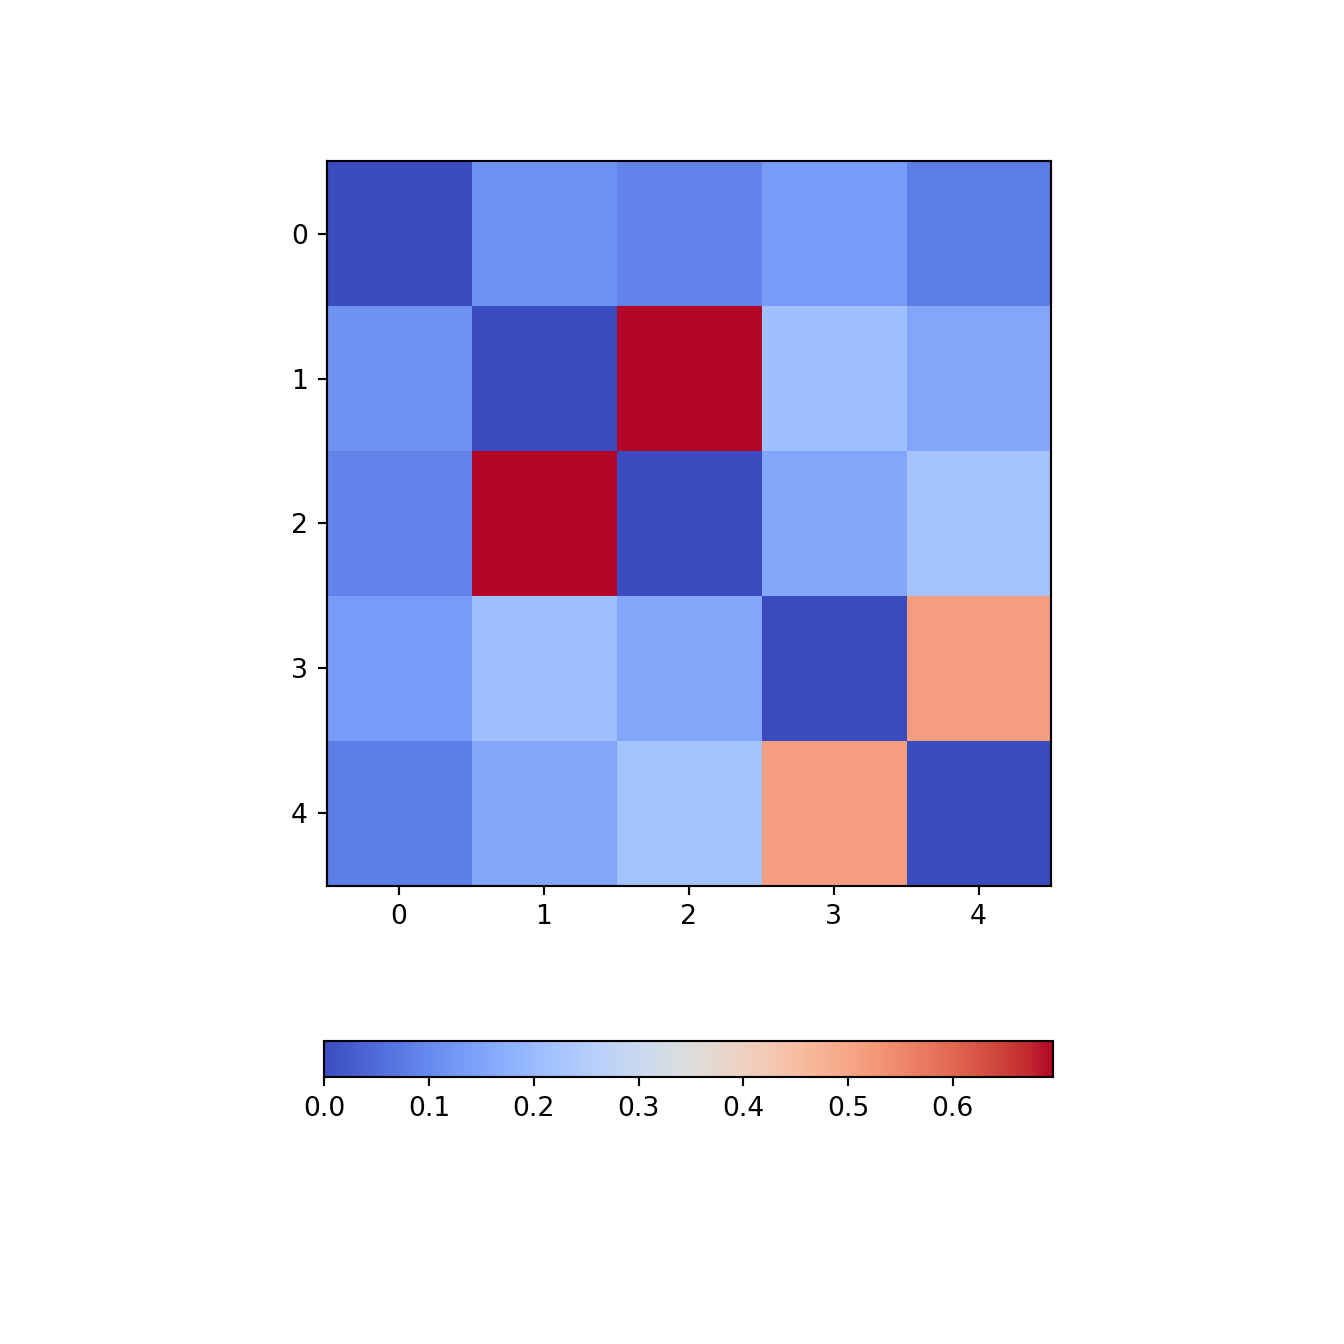

The result is that the correlation between columns ‘Height’ and ‘Weight’
is the strongest, and presumably higher than would be expected if these
two measures were independent. We can confirm this by plotting a scatter
plot for these two columns, and refer to the scatter plot for columns 2
(Height) and 5 (Diastolic blood pressure):

## Practice Exercise 4

**Spearman Correlations from the patients dataset**

Calculate and plot the correlation matrix of the first five columns, as
above, based on the [Spearman rank correlation
coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient).
This is based on the ranking of values instead of their numerical values
as for the Pearson coefficient. Spearman therefore tests for monotonic
relationships, whereas Pearson tests for linear relationships.

To import the function in question:

    from scipy.stats import spearmanr

You can then apply it:

    data_spearman_corr = spearmanr(data).correlation

``` python
from scipy.stats import spearmanr
patients_numpy = df.to_numpy()
cols = 5

patients_numpy_float = patients_numpy[:, :cols].astype(float)
patients_spearman = spearmanr(patients_numpy_float).correlation

patients_spearman
```

    array([[1.        , 0.11636668, 0.09327152, 0.12105741, 0.08703685],
           [0.11636668, 1.        , 0.65614849, 0.20036338, 0.14976559],
           [0.09327152, 0.65614849, 1.        , 0.12185782, 0.19738765],
           [0.12105741, 0.20036338, 0.12185782, 1.        , 0.48666928],
           [0.08703685, 0.14976559, 0.19738765, 0.48666928, 1.        ]])

``` python
from numpy import fill_diagonal
fill_diagonal(patients_spearman, 0)

fig, ax = subplots(figsize=(7,7))

im = ax.imshow(patients_spearman, cmap='coolwarm');
fig.colorbar(im, orientation='horizontal', shrink=0.7);

show()
```

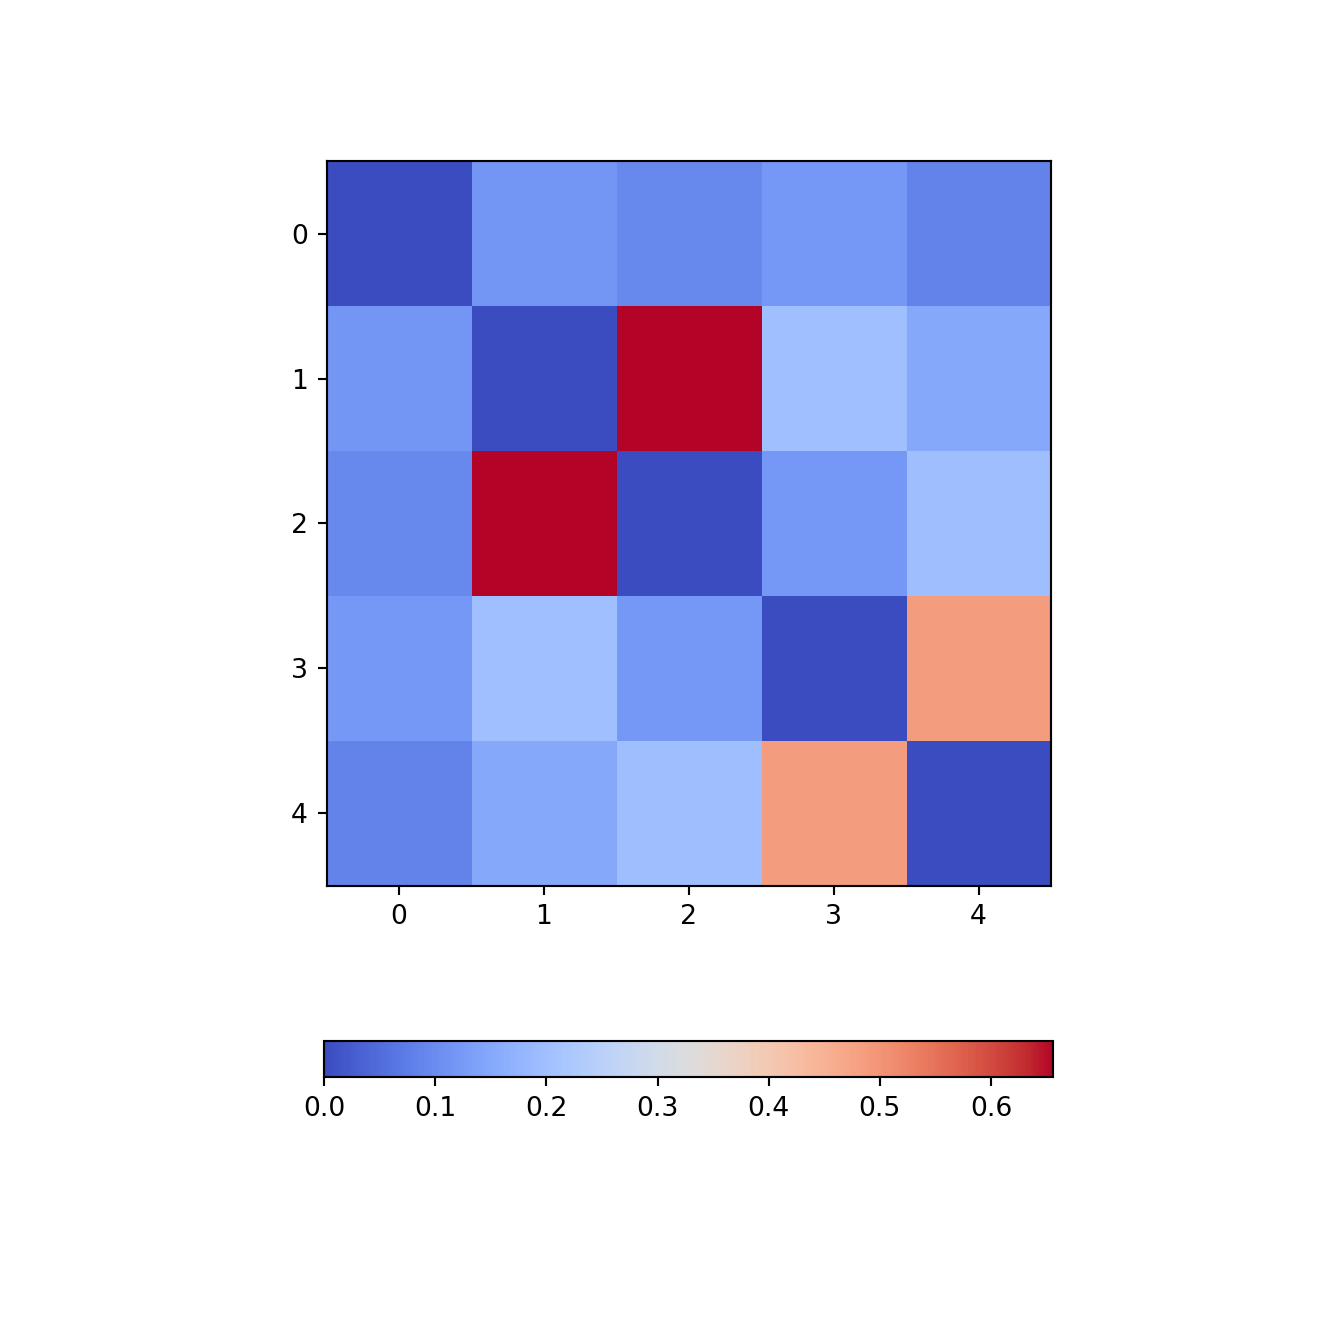

## Analysis of the Correlation matrix

### **The Correlation Coefficients**

To analyse the correlations in a dataset, we are only interested in the
<span class="math inline">\\N\*(N-1)/2\\</span> unduplicated correlation
coefficients. Here is a way to extract them and assign them to a
variable.

Firstly, we must import the function
<span class="kbd">triu_indices</span>. It provides the indices of a
matrix with specified size. The required size is obtained from our
correlation matrix, using <span class="kbd">len</span>. It is identical
to the number of columns for which we calculated the
<span class="math inline">\\CCs\\</span>.

We also need to specify that we do not want the diagonal to be included.
For this, there is an offset parameter ‘k’, which collects the indices
excluding the diagonal, provided it is set to 1. (To include the indices
of the diagonal, it would have to be set to 0).

``` python
from numpy import triu_indices

# Get the number of rows of the correlation matrix
no_cols = len(patients_corr)

# Get the indices of the 10 correlation coefficients for 5 data columns
corr_coeff_indices = triu_indices(no_cols, k=1)

# Get the 10 correlation coefficients
corr_coeffs = patients_corr[corr_coeff_indices]

print(corr_coeffs)
```

\[0.11600246 0.09135615 0.13412699 0.08059714 0.6959697 0.21407555
0.15681869 0.15578811 0.22268743 0.51184337\]

Now we plot these correlation coefficients as a bar chart to see them
one next to each other.

``` python
fig, ax = subplots()

bins = arange(len(corr_coeffs))

ax.bar(bins, corr_coeffs);

show()
```

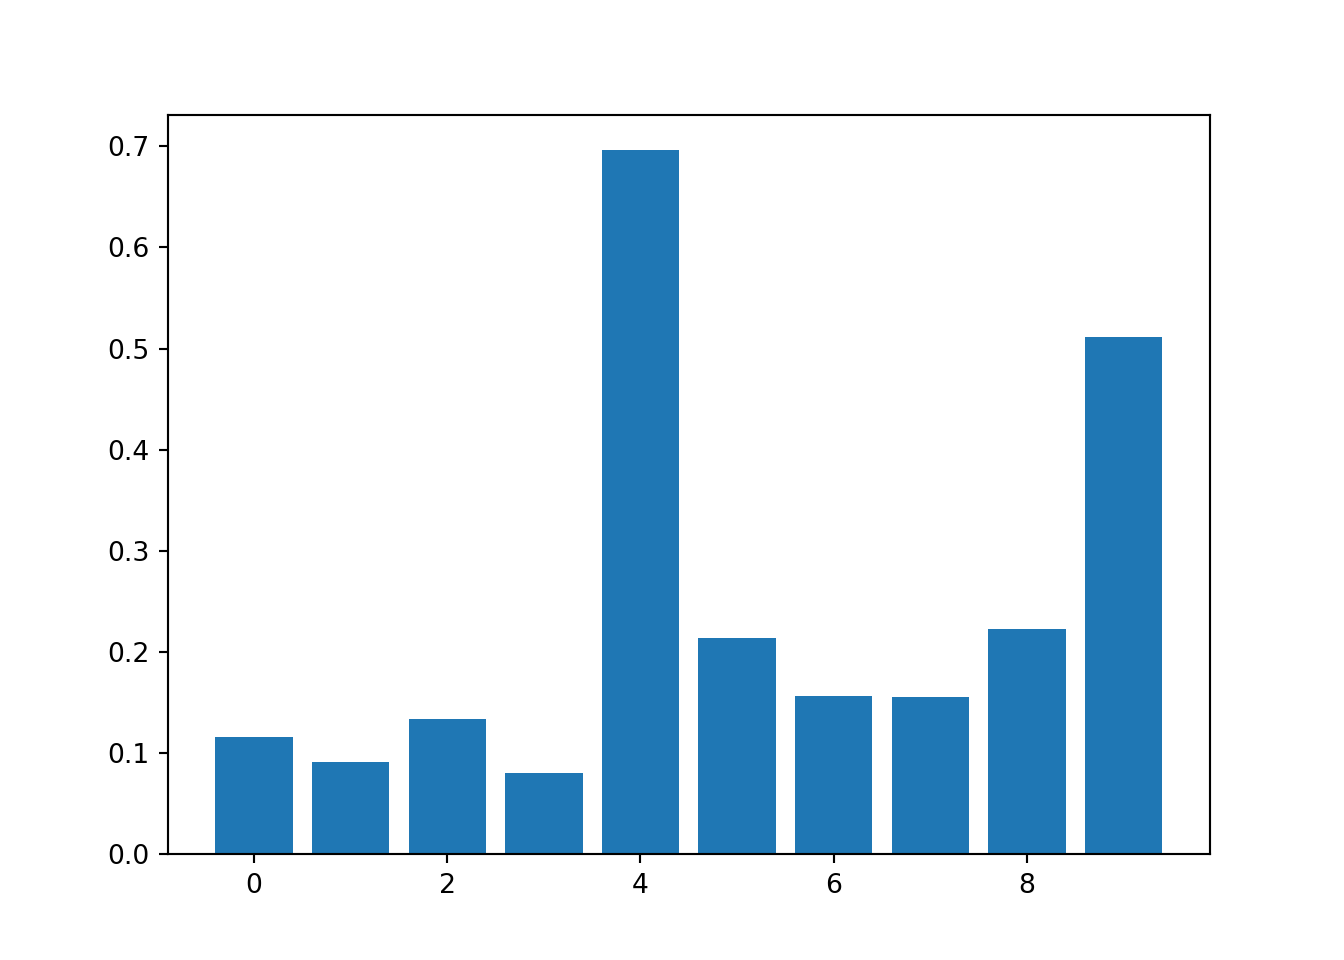

If there are a large number of coefficients, we can also display their
histogram or boxplot as summary statistics.

### **The Average Correlation per Column**

On a higher level, we can calculate the overall, or average correlation
per data column. This can be achieved by averaging over either the rows
or the columns of the correlation matrix. Because our similarity measure
is undirected, both ways of summing yield the same result.

However, we need to consider whether the value is positive or negative.
Correlation coefficients can be either positive or negative. As such,
adding for instance +1 and -1 would yield an average of 0, even though
both indicate perfect correlation and anti-correlation, respectively.
This can be addressed by using the absolute value `abs`, and ignoring
the sign.

In order to average, we can use the NumPy function:
<span class="kbd">mean</span>. This function defaults to averaging over
all values of the matrix. In order to obtain the five values by
averaging over the columns, we specify the ‘axis’ keyword argument must
be specified as 0.

``` python
from numpy import abs, mean

# Absolute values of correlation matrix
corr_matrix_abs = abs(patients_corr)

# Average of the correlation strengths
corr_column_average = mean(corr_matrix_abs, axis=0)

fig, ax = subplots()

bins = arange(corr_column_average.shape[0])

ax.bar(bins, corr_column_average );

print(corr_column_average)

show()
```

    [0.08441655 0.23657328 0.23316028 0.20316681 0.19438933]

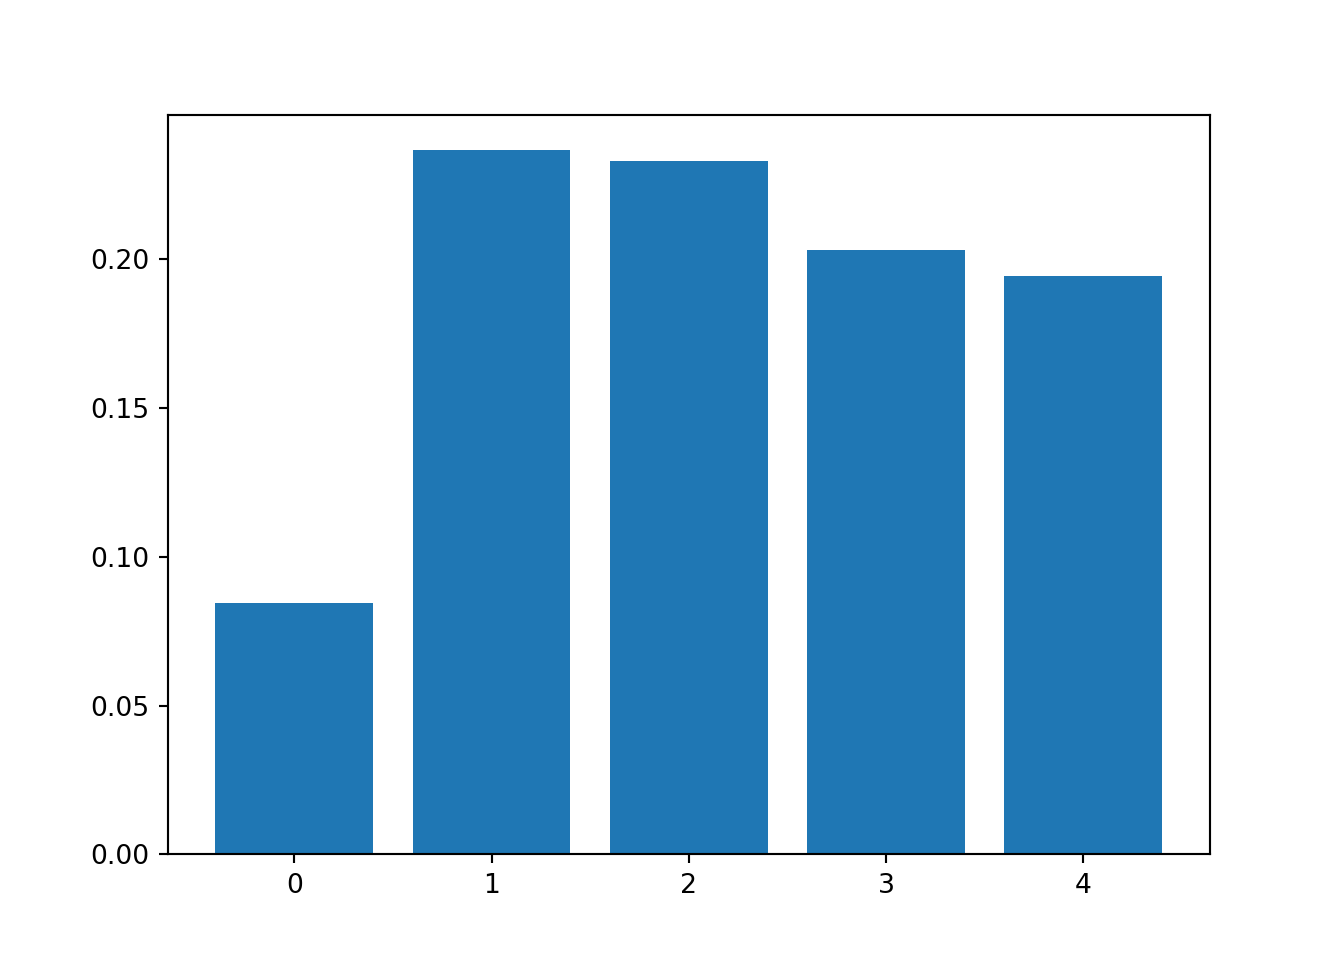

The result is that the average column correlation is on the order of 0.2
for the columns with indices 1 to 4, and less than 0.1 for the column
with index 0 (which is age).

### **The Average Dataset Correlation**

The sum over rows or columns has given us a reduced set of values to
look at. We can now take the final step and average over all correlation
coefficients. This will yield the average correlation of the dataset. It
condenses the full bivariate analysis into a single number, and can be a
starting point when comparing different datasets of the same type, for
example.

``` python
# Average of the correlation strengths
corr_matrix_average = mean(corr_matrix_abs)

print('Average correlation strength: ', round(corr_matrix_average, 3))
```

Average correlation strength: 0.19

## Application: The Diabetes Dataset

We now return to the dataset that began our enquiry into DataFrames in
the previous lesson. Let us apply the above, and perform a summary
analysis of its bivariate features.

Firstly, import the data. This is one of the example datasets from
scikit-learn: a Python library used for Machine Learning. It is already
included in the Anaconda distribution of Python, and can therefore be
directly imported, if you have installed this.

``` python
from sklearn import datasets

diabetes = datasets.load_diabetes()

data_diabetes = diabetes.data
```

For the bivariate features, let us get the correlation matrix and plot
it as a heatmap. We can make use of code that introduced above.

``` python
from numpy import fill_diagonal

data_corr_matrix = corrcoef(data_diabetes, rowvar=False)

fill_diagonal(data_corr_matrix, 0)

fig, ax = subplots(figsize=(8, 8))

im = ax.imshow(data_corr_matrix, cmap='coolwarm');

fig.colorbar(im, orientation='horizontal', shrink=0.5);

show()
```

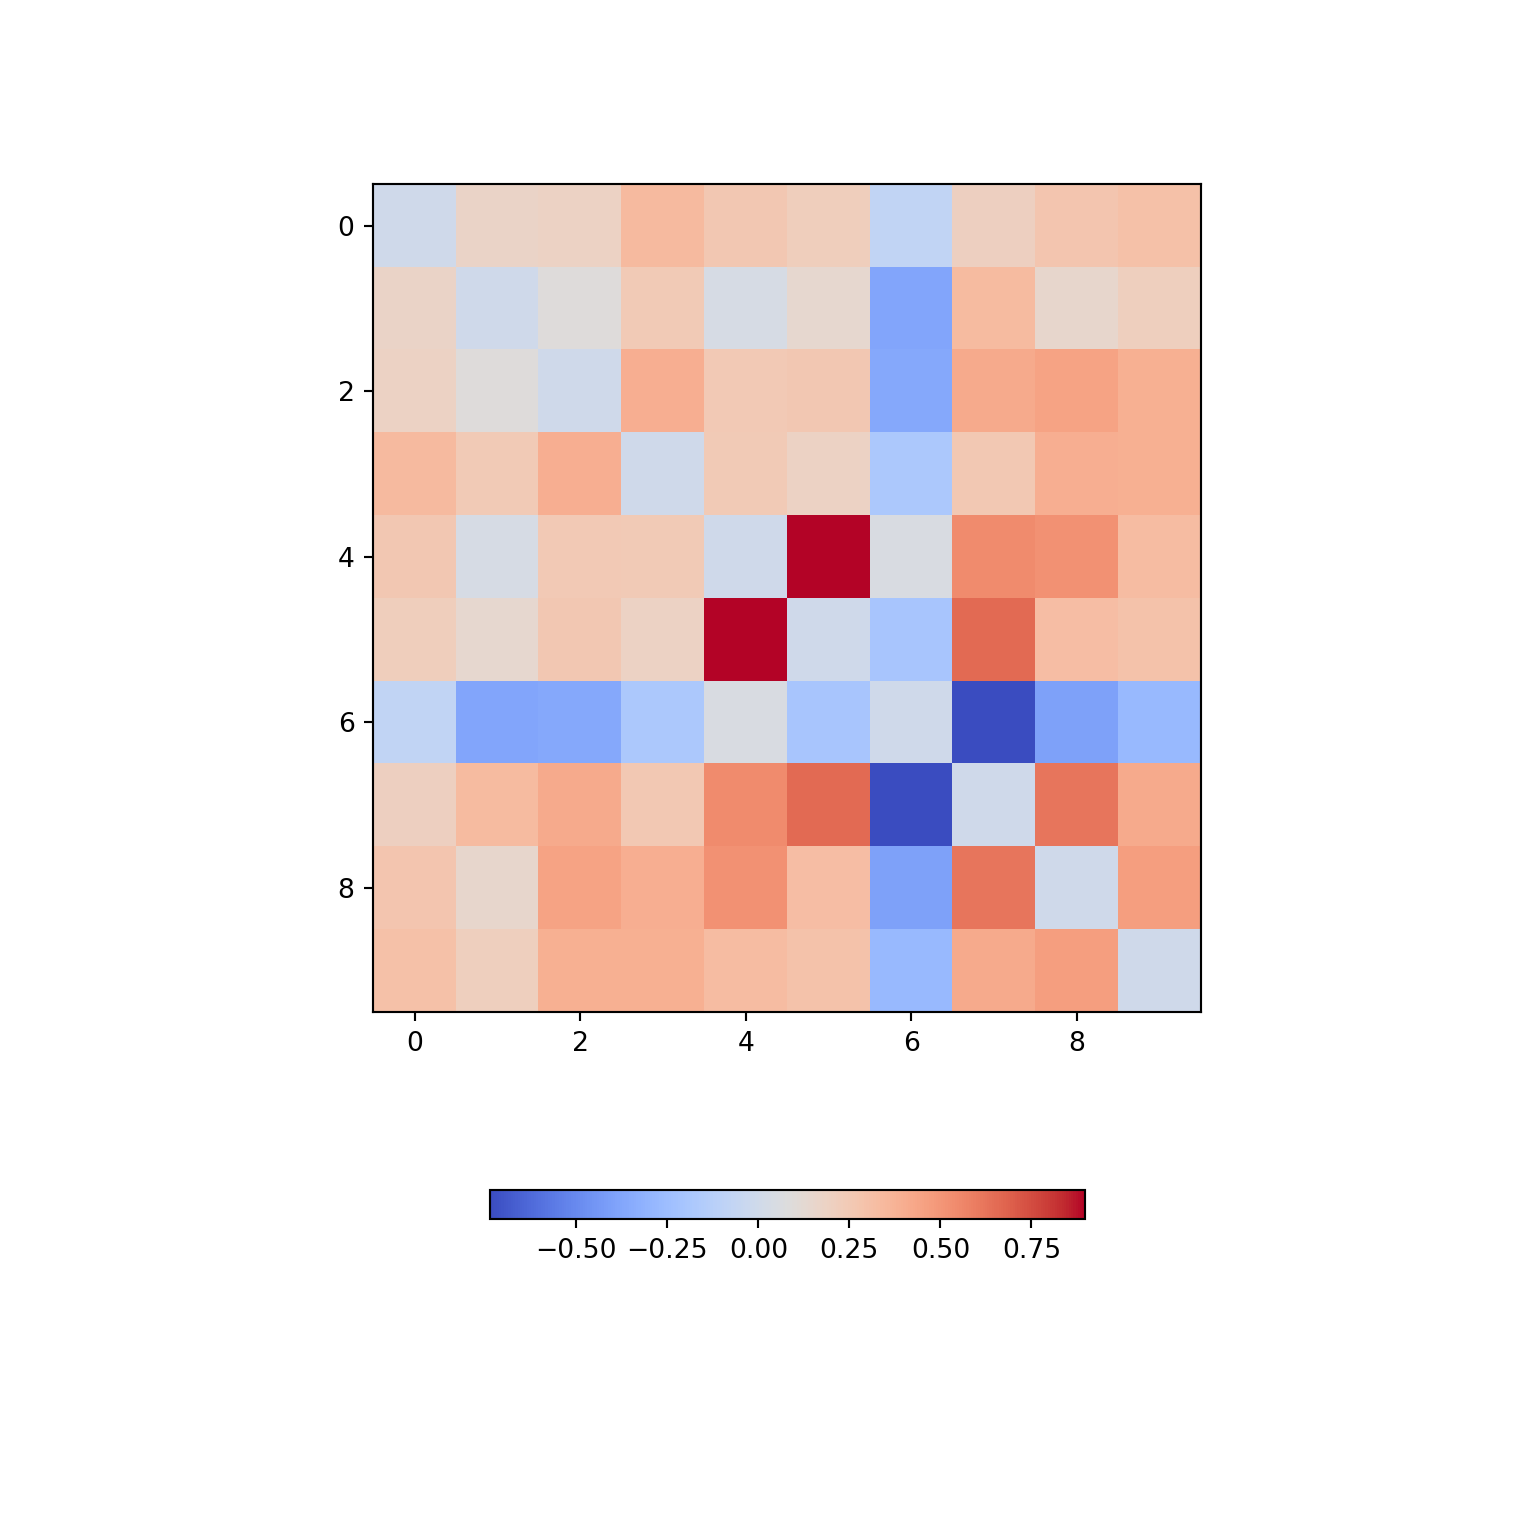

There is one strongly correlated pair (column indices 4 and 5) and one
strongly anti-correlated pair (column indices 6 and 7).

Let’s calculate the <span class="math inline">\\10\*9/2 = 45\\</span>
correlation coefficients and plot them as a histogram:

``` python
from numpy import triu_indices

data_corr_coeffs = data_corr_matrix[triu_indices(data_corr_matrix.shape[0], k=1)]

fig, ax = subplots()

ax.hist(data_corr_coeffs, bins=10);

show()
```

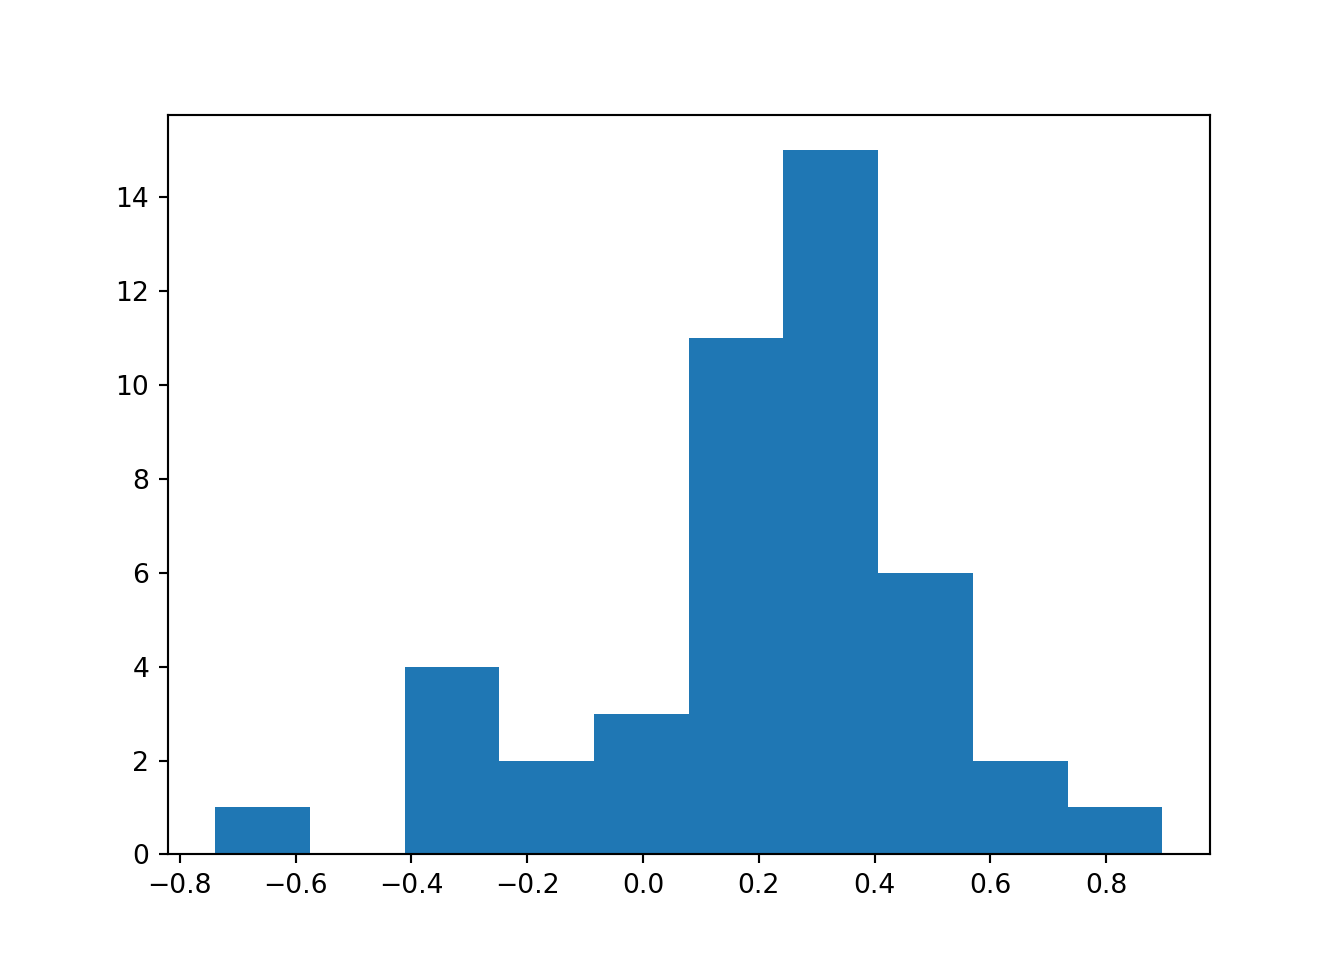

This histogram shows that the data have a distribution that is shifted
towards positive correlations. However, only four values are
(absolutely) larger than 0.5 (three positive, one negative).

Next, let’s obtain the average (absolute) correlation per column.

``` python
data_column_average = mean(abs(data_corr_matrix), axis=0)

fig, ax = subplots()

bins = arange(len(data_column_average))

ax.bar(bins, data_column_average);
ax.set_title('Average Correlation Strength per Column')
ax.set_xticks(arange(len(diabetes.feature_names)))
ax.set_xticklabels(diabetes.feature_names);

show()
```

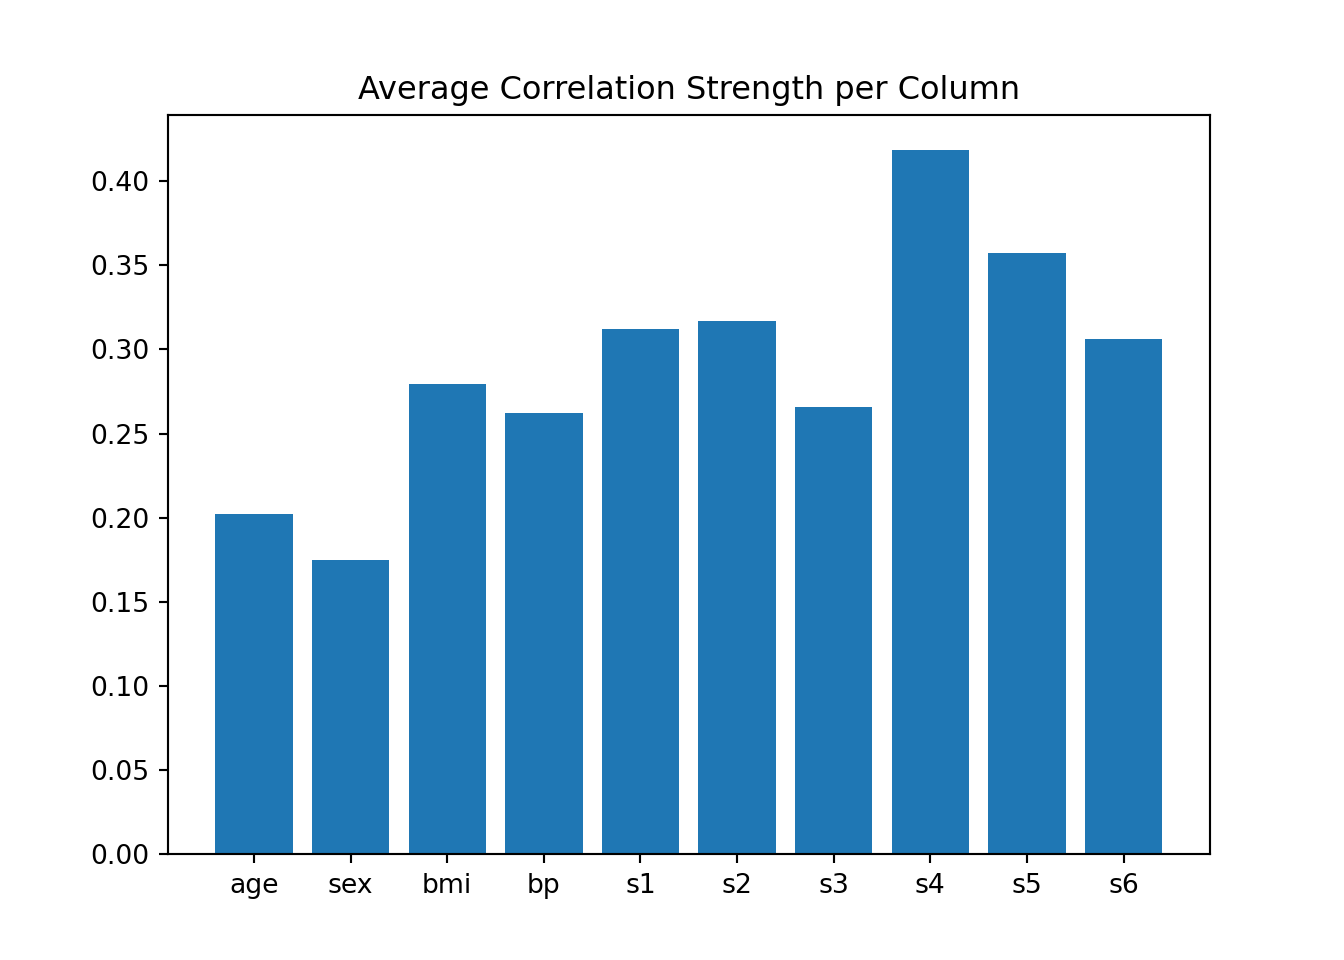

In the plot, note how the column names were extracted from the
‘diabetes’ data using `diabetes.feature_names`.

Finally, let’s obtain the average correlation of the entire dataset.

``` python
# Average of the correlation strengths
data_corr_matrix_average = mean(abs(data_corr_matrix))

print('Average Correlation Strength: ', round(data_corr_matrix_average, 3))
```

Average Correlation Strength: 0.29

## Exercises

#### End of chapter Exercises

**Assignment: The Breast Cancer Dataset**

Import the breast cancer dataset using
<span class="kbd">read_csv</span>. Based on the code in this lesson, try
to do the following:

1.  Get the summary (univariate) statistics of columns 2-10 (accessing
    indices 1:10) using <span class="kbd">describe</span>

2.  Plot the means of each column as a bar chart with standard
    deviations displayed as error bars. Why are some bars invisible?

3.  Extract the values as a NumPy array using the
    <span class="kbd">to_numpy</span> function. The shape of the array
    should be (569, 31).

4.  Calculate the correlation matrix using
    <span class="kbd">corrcoef</span> from NumPy and plot it as a
    heatmap. The shape of the matrix should be (31, 31). Use
    `fill_diagonal` to set the diagonal elements to 0.

5.  Calculate the average column correlation and plot it as a bar chart.

6.  Calculate the average correlation strength of the dataset.

In case of doubt, try to get help from the respective documentation
available for Pandas DataFrames, NumPy and Matplotlib.

## Solutions are provided after assignments are marked.

-   Quantities based on data from two variables are referred to as
    bivariate measures.
-   Bivariate properties can be studied and visualised using
    `matplotlib` and `NumPy`.
-   Multivariate data analyses can help to uncover relationships between
    recorded variables.
-   The functions `corr` and `corrcoef` can be used to calculate the
    <span class="math inline">\\PCC\\</span>.
-   A correlation matrix can be visualised as a heatmap.

LS0tCnRpdGxlOiAiRGF0YUZyYW1lcyAtIFBhcnQgMiIKdGVhY2hpbmc6IDYwCmV4ZXJjaXNlczogNjAKLS0tCgpbKipEb3dubG9hZCBjaGFwdGVyIFBERiAoLnBkZikuKipdKGh0dHBzOi8vZHJpdmUudXNlcmNvbnRlbnQuZ29vZ2xlLmNvbS91LzEvdWM/aWQ9MXJzM0NyZEZkX0lsY2I1ZG1MM0tMOE42VjNuOTlmT2haJmV4cG9ydD1kb3dubG9hZCkKClsqKkRvd25sb2FkIGNoYXB0ZXIgbm90ZWJvb2sgKC5pcHluYikuKipdKGh0dHBzOi8vZHJpdmUudXNlcmNvbnRlbnQuZ29vZ2xlLmNvbS91LzEvdWM/aWQ9MXZCajhWMnNad1U3VzNmYWg4dWk2aWp5Skh3UkFOQnRGJmV4cG9ydD1kb3dubG9hZCkKCls8c3BhbiBzdHlsZT0iY29sb3I6IHJnYigyNTUsIDAsIDApOyI+KipNYW5kYXRvcnkgTGVzc29uIEZlZWRiYWNrIFN1cnZleSoqPC9zcGFuPl0oaHR0cHM6Ly9kb2NzLmdvb2dsZS5jb20vZm9ybXMvZC9lLzFGQUlwUUxTZHIwY2FwRjdqbG9KaFBIM1BraTFCM0xab0tPRzE2cG9PcHVWSjdTTDJMa3dMSFFBL3ZpZXdmb3JtP3BsaT0xKQoKYGBge3Igc2V0dXAsIGluY2x1ZGU9RkFMU0V9CmxpYnJhcnkocmV0aWN1bGF0ZSkKCiMgVW5zZXQgYW55IHByZXZpb3VzbHkgc2V0IFB5dGhvbiBlbnZpcm9ubWVudHMgdG8gYXZvaWQgY29uZmxpY3RzClN5cy51bnNldGVudigiUkVUSUNVTEFURV9QWVRIT04iKQoKIyBDaGVjayBpZiBQYW5kb2MgaXMgYXZhaWxhYmxlCmlmICghZmlsZS5leGlzdHMoIi9vcHQvaG9tZWJyZXcvYmluL3BhbmRvYyIpKSB7CiAgc3RvcCgiUGFuZG9jIGlzIG5vdCBmb3VuZC4gUGxlYXNlIGluc3RhbGwgUGFuZG9jIG9yIHVwZGF0ZSB0aGUgcGF0aC4iKQp9CgojIER5bmFtaWNhbGx5IHNldCB0aGUgUHl0aG9uIGVudmlyb25tZW50CnRyeUNhdGNoKHsKICB1c2VfdmlydHVhbGVudigiL1VzZXJzL0FkYW0vLnZpcnR1YWxlbnZzL3ItcmV0aWN1bGF0ZSIsIHJlcXVpcmVkID0gVFJVRSkKICBjYXQoIlB5dGhvbiBlbnZpcm9ubWVudCBzZXQgc3VjY2Vzc2Z1bGx5LlxuIikKfSwgZXJyb3IgPSBmdW5jdGlvbihlKSB7CiAgY2F0KCJFcnJvciBzZXR0aW5nIFB5dGhvbiBlbnZpcm9ubWVudDoiLCBlJG1lc3NhZ2UsICJcbiIpCiAgc3RvcCgiRmFpbGVkIHRvIHNldCBQeXRob24gZW52aXJvbm1lbnQuIikKfSkKCiMgVmFsaWRhdGUgUHl0aG9uIGVudmlyb25tZW50CnRyeUNhdGNoKHsKICBweV9jb25maWcoKQogIHB5X3J1bl9zdHJpbmcoImltcG9ydCBudW1weSIpICAjIENoZWNrIGZvciBudW1weSBhdmFpbGFiaWxpdHkKICBjYXQoIlB5dGhvbiBlbnZpcm9ubWVudCBhbmQgbnVtcHkgYXJlIGNvcnJlY3RseSBjb25maWd1cmVkLlxuIikKfSwgZXJyb3IgPSBmdW5jdGlvbihlKSB7CiAgY2F0KCJFcnJvciBpbiBQeXRob24gZW52aXJvbm1lbnQgY29uZmlndXJhdGlvbiBvciBudW1weSBjaGVjazoiLCBlJG1lc3NhZ2UsICJcbiIpCiAgc3RvcCgiRmFpbGVkIHRvIHZhbGlkYXRlIFB5dGhvbiBlbnZpcm9ubWVudC4iKQp9KQoKIyBDb25maWd1cmUga25pdHIgY2h1bmtzIHRvIGVuc3VyZSBQeXRob24gY29kZSBpcyBleGVjdXRlZCBjb3JyZWN0bHkKa25pdHI6Om9wdHNfY2h1bmskc2V0KAogIGV2YWwgPSBUUlVFLCAgICAjIEV4ZWN1dGUgdGhlIGNvZGUgY2h1bmtzCiAgZWNobyA9IFRSVUUsICAgICMgRGlzcGxheSB0aGUgY29kZSBjaHVua3MgaW4gdGhlIGZpbmFsIG91dHB1dAogIG1lc3NhZ2UgPSBGQUxTRSwgICMgU3VwcHJlc3MgbWVzc2FnZXMgZnJvbSBiZWluZyBzaG93bgogIHdhcm5pbmcgPSBGQUxTRSwgICMgU3VwcHJlc3Mgd2FybmluZ3MgZnJvbSBiZWluZyBzaG93bgogIHJlc3VsdHMgPSAnYXNpcycsICAjIEVuc3VyZSBvdXRwdXQgaXMgaGFuZGxlZCBwcm9wZXJseQogIGVuZ2luZSA9ICJweXRob24iICAjIFVzZSBQeXRob24gZW5naW5lIGZvciByZWxldmFudCBjaHVua3MKKQoKY2F0KCJTZXR1cCBjaHVuayBjb21wbGV0ZS5cbiIpCmBgYAoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogcXVlc3Rpb25zCgotIFdoYXQgaXMgYml2YXJpYXRlIG9yIG11bHRpdmFyaWF0ZSBhbmFseXNpcz8KLSBIb3cgYXJlIGJpdmFyaWF0ZSBwcm9wZXJ0aWVzIG9mIGRhdGEgaW50ZXJwcmV0ZWQ/Ci0gSG93IGNhbiBhIGJpdmFyaWF0ZSBxdWFudGl0eSBiZSBleHBsYWluZWQ/Ci0gV2hlbiB0byB1c2UgYSBjb3JyZWxhdGlvbiBtYXRyaXg/Ci0gV2hhdCBhcmUgd2F5cyB0byBzdHVkeSByZWxhdGlvbnNoaXBzIGluIGRhdGE/Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojogb2JqZWN0aXZlcwoKLSBQcmFjdGlzZSB3b3JraW5nIHdpdGggUGFuZGFzIERhdGFGcmFtZXMgYW5kIE51bVB5IGFycmF5cy4KLSBCaXZhcmlhdGUgYW5hbHlzaXMgb2YgUGFuZGFzIERhdGFGcmFtZSAvIE51bVB5IGFycmF5LgotIFRoZSBQZWFyc29uIGNvcnJlbGF0aW9uIGNvZWZmaWNpZW50ICgkUENDJCkuCi0gQ29ycmVsYXRpb24gTWF0cml4IGFzIGFuIGV4YW1wbGUgb2YgYml2YXJpYXRlIHN1bW1hcnkgc3RhdGlzdGljcy4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKPGJyPgo8cCBhbGlnbiA9ICJjZW50ZXIiPgo8aWZyYW1lIHdpZHRoPSI1NjAiIGhlaWdodD0iMzE1IiBzcmM9Imh0dHBzOi8vd3d3LnlvdXR1YmUuY29tL2VtYmVkL05qdkZoN2k3NHBJIiB0aXRsZT0iWW91VHViZSB2aWRlbyBwbGF5ZXIiIGZyYW1lYm9yZGVyPSIwIiBhbGxvdz0iYWNjZWxlcm9tZXRlcjsgYXV0b3BsYXk7IGNsaXBib2FyZC13cml0ZTsgZW5jcnlwdGVkLW1lZGlhOyBneXJvc2NvcGU7IHBpY3R1cmUtaW4tcGljdHVyZSIgYWxsb3dmdWxsc2NyZWVuPjwvaWZyYW1lPgo8L3A+Cjxicj4KCjxwIGFsaWduID0gImNlbnRlciI+CjxpZnJhbWUgd2lkdGg9IjU2MCIgaGVpZ2h0PSIzMTUiIHNyYz0iaHR0cHM6Ly93d3cueW91dHViZS5jb20vZW1iZWQvWjhlWDRuY0hqeVEiIHRpdGxlPSJZb3VUdWJlIHZpZGVvIHBsYXllciIgZnJhbWVib3JkZXI9IjAiIGFsbG93PSJhY2NlbGVyb21ldGVyOyBhdXRvcGxheTsgY2xpcGJvYXJkLXdyaXRlOyBlbmNyeXB0ZWQtbWVkaWE7IGd5cm9zY29wZTsgcGljdHVyZS1pbi1waWN0dXJlIiBhbGxvd2Z1bGxzY3JlZW4+PC9pZnJhbWU+CjwvcD4KPGJyPgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6IHByZXJlcQoKIyMgUHJlcmVxdWlzaXRlcwotIFB5dGhvbiBBcnJheXMKLSBCYXNpYyBzdGF0aXN0aWNzLCBpbiBwYXJ0aWN1bGFyLCB0aGUgW2NvcnJlbGF0aW9uIGNvZWZmaWNpZW50XShodHRwczovL2VuLndpa2lwZWRpYS5vcmcvd2lraS9QZWFyc29uX2NvcnJlbGF0aW9uX2NvZWZmaWNpZW50KQotIFBhbmRhcyBEYXRhRnJhbWVzOiBpbXBvcnQgYW5kIGhhbmRsaW5nCjo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjYWxsb3V0CgojIyBSZW1lbWJlcgpBbnkgZGF0YXNldCBhc3NvY2lhdGVkIHdpdGggdGhpcyBsZXNzb24gaXMgcHJlc2VudCBpbiBgRGF0YWAgZm9sZGVyIG9mIHlvdXIgYXNzaWdubWVudCByZXBvc2l0b3J5LCBhbmQgY2FuIGFsc28gYmUgZG93bmxvYWRlZCB1c2luZyB0aGUgbGluayBnaXZlbiBhYm92ZSBpbiBbU3VtbWFyeSBhbmQgU2V0dXBdKC4uL2xlYXJuZXJzL3NldHVwLm1kKSBmb3IgdGhpcyBMZXNzb24uCgo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKClRoZSBmb2xsb3dpbmcgY2VsbCBjb250YWlucyBmdW5jdGlvbnMgdGhhdCBuZWVkIHRvIGJlIGltcG9ydGVkLCBwbGVhc2UgZXhlY3V0ZSBpdCBiZWZvcmUgY29udGludWluZyB3aXRoIHRoZSBJbnRyb2R1Y3Rpb24uCgpgYGB7cHl0aG9ufQojIFRvIGltcG9ydCBkYXRhIGZyb20gYSBjc3YgZmlsZSBpbnRvIGEgUGFuZGFzIERhdGFGcmFtZQpmcm9tIHBhbmRhcyBpbXBvcnQgcmVhZF9jc3YKCiMgVG8gaW1wb3J0IGEgZGF0YXNldCBmcm9tIHNjaWtpdC1sZWFybgpmcm9tIHNrbGVhcm4gaW1wb3J0IGRhdGFzZXRzCgojIFRvIGNyZWF0ZSBmaWd1cmUgZW52aXJvbm1lbnRzIGFuZCBwbG90cwpmcm9tIG1hdHBsb3RsaWIucHlwbG90IGltcG9ydCBzdWJwbG90cywgc2hvdwoKIyBTcGVjaWZpYyBudW1weSBmdW5jdGlvbnMsIGRlc2NyaXB0aW9uIGluIHRoZSBtYWluIGJvZHkKZnJvbSBudW1weSBpbXBvcnQgY29ycmNvZWYsIGZpbGxfZGlhZ29uYWwsIHRyaXVfaW5kaWNlcywgYXJhbmdlCgpgYGAKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjYWxsb3V0CgojIyBOb3RlCgpJbiBtYW55IG9ubGluZSB0dXRvcmlhbHMgeW91IGNhbiBmaW5kIHRoZSBmb2xsb3dpbmcgY29udmVudGlvbiB3aGVuIGltcG9ydGluZyBmdW5jdGlvbnM6CgpgYGB7cHl0aG9ufQppbXBvcnQgbnVtcHkgYXMgbnAKaW1wb3J0IHBhbmRhcyBhcyBwZApgYGAKCihvciBzaW1pbGFyKS4gSW4gdGhpcyBjYXNlLCB0aGUgd2hvbGUgbGlicmFyeSBpcyBpbXBvcnRlZCBhbmQgYW55IGZ1bmN0aW9uIGluIHRoYXQgbGlicmFyeSBpcyB0aGVuIGF2YWlsYWJsZSB1c2luZyBlLmcuIGBwZC5yZWFkX2NzdihteV9maWxlKWAKCgpXZSBkb24ndCByZWNvbW1lbmQgdGhpcyBhcyB0aGUgaW1wb3J0IG9mIHRoZSB3aG9sZSBsaWJyYXJ5IHVzZXMgYSBsb3Qgb2Ygd29ya2luZyBtZW1vcnkgKGUuZy4gb24gdGhlIG9yZGVyIG9mIDEwMCBNQiBmb3IgTnVtUHkpLgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6CgojIyBJbnRyb2R1Y3Rpb24KCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkluIHRoZSBwcmV2aW91cyBsZXNzb24sIHdlIG9idGFpbmVkIHNvbWUgYmFzaWMgZGF0YSBxdWFudGlmaWNhdGlvbnMgdXNpbmcgdGhlIDxrYmQ+ZGVzY3JpYmU8L2tiZD4gZnVuY3Rpb24uIEVhY2ggb2YgdGhlc2UgcXVhbnRpdGllcyB3YXMgY2FsY3VsYXRlZCBmb3IgaW5kaXZpZHVhbCBjb2x1bW5zLCB3aGVyZSBlYWNoIGNvbHVtbiBjb250YWluZWQgYSBkaWZmZXJlbnQgbWVhc3VyZWQgdmFyaWFibGUuIEhvd2V2ZXIsIGluIGRhdGEgYW5hbHlzaXMgaW4gZ2VuZXJhbCAoYW5kIGluIG1hY2hpbmUgbGVhcm5pbmcgaW4gcGFydGljdWxhciksIG9uZSBvZiB0aGUgbWFpbiBwb2ludHMgb2YgYW5hbHlzaXMgaXMgdG8gdHJ5IGFuZCBleHBsb2l0IHRoZSBwcmVzZW5jZSBvZiBpbmZvcm1hdGlvbiB0aGF0IGxpZXMgaW4gcmVsYXRpb25zaGlwcyBfYmV0d2Vlbl8gdmFyaWFibGVzIChpLmUuIGNvbHVtbnMgaW4gb3VyIGRhdGEpLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClF1YW50aXRpZXMgdGhhdCBhcmUgYmFzZWQgb24gZGF0YSBmcm9tIHR3byB2YXJpYWJsZXMgYXJlIHJlZmVycmVkIHRvIGFzIF9fYml2YXJpYXRlX18gbWVhc3VyZXMuIEFuYWx5c2VzIHRoYXQgbWFrZSB1c2Ugb2YgYml2YXJpYXRlIChhbmQgcG90ZW50aWFsbHkgaGlnaGVyIG9yZGVyKSBxdWFudGl0aWVzIGFyZSByZWZlcnJlZCB0byBhcyBiaXZhcmlhdGUgb3IgbW9yZSBicm9hZGx5LCBfX211bHRpdmFyaWF0ZSBkYXRhIGFuYWx5c2VzX18uCjwvcD4KCldoZW4gd2UgY29tYmluZSB1bmktIGFuZCBtdWx0aXZhcmlhdGUgYW5hbHlzZXMsIHdlIGNhbiBvZnRlbiBvYnRhaW4gYSB0aG9yb3VnaCwgY29tcHJlaGVuc2l2ZSBvdmVydmlldyBvZiB0aGUgYmFzaWMgcHJvcGVydGllcyBvZiBhIGRhdGFzZXQuCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogZGlzY3Vzc2lvbgoKIyMjICoqRXhhbXBsZTogVGhlIGRpYWJldGVzIGRhdGFzZXQqKgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVXNpbmcgdGhlIGRpYWJldGVzIGRhdGFzZXQgKGludHJvZHVjZWQgaW4gdGhlIERhdGEgSGFuZGxpbmcgMSBsZXNzb24pLCB3ZSBjYW4gYmVnaW4gYnkgbG9va2luZyBhdCB0aGUgZGF0YSBmcm9tIHRocmVlIG9mIGl0cyBjb2x1bW5zOiBUaGUgdXBwZXIgcm93IG9mIHRoZSBiZWxvdyBmaWd1cmUgc2hvd3MgdGhyZWUgaGlzdG9ncmFtcy4gQSBoaXN0b2dyYW0gaXMgYSBzdW1tYXJpc2luZyBwbG90IG9mIHRoZSByZWNvcmRpbmdzIG9mIGEgc2luZ2xlIHZhcmlhYmxlLgpUaGUgaGlzdG9ncmFtcyBvZiBjb2x1bW5zIHdpdGggaW5kaWNlcyAzLCA0LCBhbmQgNSBoYXZlIHNpbWlsYXIgbWVhbnMgYW5kIHZhcmlhbmNlcywgd2hpY2ggY2FuIGJlIGV4cGxhaW5lZCBieSBwcmlvciBub3JtYWxpc2F0aW9uIG9mIHRoZSBkYXRhLiBUaGUgc2hhcGVzIGRpZmZlciwgYnV0IHRoaXMgZG9lcyBub3QgdGVsbCB1cyBhbnl0aGluZyBhYm91dCBhIHJlbGF0aW9uc2hpcCBiZXR3ZWVuIHRoZSBtZWFzdXJlbWVudHMuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KQmVmb3JlIHRoZSBhcHBsaWNhdGlvbiBvZiBhbnkgbWFjaGluZSBsZWFybmluZyBtZXRob2RzLCBpdHMgaXMgaW1wb3J0YW50IHRvIHVuZGVyc3RhbmQgd2hldGhlciB0aGVyZSBpcyBldmlkZW5jZSBvZiBhbnkgcmVsYXRpb25zaGlwcyBiZXR3ZWVuIHRoZSBpbmRpdmlkdWFsIHZhcmlhYmxlcyBpbiBhIERhdGFGcmFtZS4gT25lIHBvdGVudGlhbCByZWxhdGlvbnNoaXBzIGlzIHRoYXQgdGhlIHZhcmlhYmxlcyBhcmUgJ3NpbWlsYXInLgpPbmUgd2F5IHRvIGNoZWNrIGZvciB0aGUgc2ltaWxhcml0eSBiZXR3ZWVuIHZhcmlhYmxlcyBpbiBhIGRhdGFzZXQsIGlzIHRvIGNyZWF0ZSBhIFtzY2F0dGVyIHBsb3RdKGh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1NjYXR0ZXJfcGxvdCkuIFRoZSBib3R0b20gcm93IG9mIHRoZSBmaWd1cmUgYmVsb3cgY29udGFpbnMgdGhlIHRocmVlIHNjYXR0ZXIgcGxvdHMgYmV0d2VlbiB2YXJpYWJsZXMgdXNlZCB0byBjcmVhdGUgdGhlIGhpc3RvZ3JhbXMgaW4gdGhlIHRvcCByb3cuCjwvcD4KKFBsZWFzZSBleGVjdXRlIHRoZSBjb2RlIGluIG9yZGVyIHRvIGdlbmVyYXRlIHRoZSBmaWd1cmVzLiBXZSB3aWxsIGRlc2NyaWJlIHRoZSBzY2F0dGVyIHBsb3QgYW5kIGl0cyBmZWF0dXJlcywgbGF0ZXIuKQoKYGBge3B5dGhvbiwgcmVzdWx0cz0naGlkZScsIGNvbGxhcHNlPVRSVUV9CiMgRmlndXJlIENvZGUKCmRpYWJldGVzID0gZGF0YXNldHMubG9hZF9kaWFiZXRlcygpCgpkaWFiZXRlc19kYXRhID0gZGlhYmV0ZXMuZGF0YQoKZmlnLCBheCA9IHN1YnBsb3RzKGZpZ3NpemU9KDIxLCAxMCksIG5jb2xzPTMsIG5yb3dzPTIpCgojIEhpc3RvZ3JhbXMKYXhbMCwwXS5oaXN0KGRpYWJldGVzX2RhdGFbOiwzXSwgYmlucz0yMCkKYXhbMCwwXS5zZXRfeWxhYmVsKCdDb3VudCcsIGZvbnRzaXplPTIwKQoKYXhbMCwxXS5oaXN0KGRpYWJldGVzX2RhdGFbOiw0XSwgYmlucz0yMCkKYXhbMCwxXS5zZXRfeWxhYmVsKCdDb3VudCcsIGZvbnRzaXplPTIwKQoKYXhbMCwyXS5oaXN0KGRpYWJldGVzX2RhdGFbOiw1XSwgYmlucz0yMCkKYXhbMCwyXS5zZXRfeWxhYmVsKCdDb3VudCcsIGZvbnRzaXplPTIwKQoKIyBTY2F0dGVyIHBsb3RzCmF4WzEsMF0uc2NhdHRlcihkaWFiZXRlc19kYXRhWzosM10sIGRpYWJldGVzX2RhdGFbOiw0XSk7CmF4WzEsMF0uc2V0X3hsYWJlbCgnQ29sdW1uIDMnLCBmb250c2l6ZT0yMCkKYXhbMSwwXS5zZXRfeWxhYmVsKCdDb2x1bW4gNCcsIGZvbnRzaXplPTIwKQoKYXhbMSwxXS5zY2F0dGVyKGRpYWJldGVzX2RhdGFbOiw0XSwgZGlhYmV0ZXNfZGF0YVs6LDVdKTsKYXhbMSwxXS5zZXRfeGxhYmVsKCdDb2x1bW4gNCcsIGZvbnRzaXplPTIwKQpheFsxLDFdLnNldF95bGFiZWwoJ0NvbHVtbiA1JywgZm9udHNpemU9MjApCgpheFsxLDJdLnNjYXR0ZXIoZGlhYmV0ZXNfZGF0YVs6LDVdLCBkaWFiZXRlc19kYXRhWzosM10pOwpheFsxLDJdLnNldF94bGFiZWwoJ0NvbHVtbiA1JywgZm9udHNpemU9MjApCmF4WzEsMl0uc2V0X3lsYWJlbCgnQ29sdW1uIDMnLCBmb250c2l6ZT0yMCk7CgpzaG93KCkKCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KV2hlbiBwbG90dGluZyB0aGUgZGF0YSBhZ2FpbnN0IGVhY2ggb3RoZXIgaW4gcGFpcnMgKGFzIGRpc3BsYXllZCBpbiB0aGUgYm90dG9tIHJvdyBvZiB0aGUgZmlndXJlKSwgZGF0YSBjb2x1bW4gMyBwbG90dGVkIGFnYWluc3QgY29sdW1uIDQgKGxlZnQpIGFuZCBjb2x1bW4gNSBhZ2FpbnN0IDMgKHJpZ2h0KSBib3RoIHNob3cgYSBmYWlybHkgdW5pZm9ybSBjaXJjdWxhciBkaXN0cmlidXRpb24gb2YgcG9pbnRzLiBUaGlzIGlzIHdoYXQgd291bGQgYmUgZXhwZWN0ZWQgaWYgdGhlIGRhdGEgaW4gdGhlIHR3byBjb2x1bW5zIHdlcmUgaW5kZXBlbmRlbnQgb2YgZWFjaCBvdGhlci4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpJbiBjb250cmFzdCwgY29sdW1uIDQgYWdhaW5zdCA1IChjZW50cmUsIGJvdHRvbSkgc2hvd3MgYW4gZWxsaXB0aWNhbCwgcG9pbnRlZCBzaGFwZSBhbG9uZyB0aGUgbWFpbiBkaWFnb25hbC4gVGhpcyBzaG93cyB0aGF0IHRoZXJlIGlzIGEgY2xlYXIgcmVsYXRpb25zaGlwIGJldHdlZW4gdGhlc2UgZGF0YS4gU3BlY2lmaWNhbGx5LCBpdCBpbmRpY2F0ZXMgdGhhdCB0aGUgdHdvIHZhcmlhYmxlcyByZWNvcmRlZCBpbiB0aGVzZSBjb2x1bW5zIChpbmRpY2VzIDQgYW5kIDUpIGFyZSBfbm90XyBpbmRlcGVuZGVudCBvZiBlYWNoIG90aGVyLiBUaGV5IGV4aGliaXQgbW9yZSBzaW1pbGFyaXR5IHRoYW4gd291bGQgYmUgZXhwZWN0ZWQgb2YgaW5kZXBlbmRlbnQgdmFyaWFibGVzLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkluIHRoaXMgbGVzc29uLCB3ZSBhaW0gdG8gb2J0YWluIGFuIG92ZXJ2aWV3IG9mIHRoZSBzaW1pbGFyaXRpZXMgaW4gYSBkYXRhc2V0LiBXZSB3aWxsIGZpcnN0bHkgaW50cm9kdWNlIF9fYml2YXJpYXRlX18gdmlzdWFsaXNhdGlvbiB1c2luZyBNYXRwbG90bGliLiBXZSB3aWxsIHRoZW4gZ28gb24gdG8gZGVtb25zdHJhdGUgdGhlIHVzZSBvZiBOdW1QeSBmdW5jdGlvbnMgaW4gY2FsY3VsYXRpbmcgY29ycmVsYXRpb24gY29lZmZpY2llbnRzIGFuZCBvYnRhaW5pbmcgYSBjb3JyZWxhdGlvbiBtYXRyaXgsIGFzIGEgbWVhbnMgb2YgaW50cm9kdWNpbmcgX19tdWx0aXZhcmlhdGVfXyBhbmFseXNpcy4gQ29tYmluZWQgd2l0aCB0aGUgYmFzaWMgc3RhdGlzdGljcyBjb3ZlcmVkIGluIHRoZSBwcmV2aW91cyBsZXNzb24sIHdlIGNhbiBvYnRhaW4gYSBnb29kIG92ZXJ2aWV3IG9mIGEgaGlnaC1kaW1lbnNpb25hbCBkYXRhc2V0LCBwcmlvciB0byB0aGUgYXBwbGljYXRpb24gb2YgbWFjaGluZSBsZWFybmluZyBhbGdvcml0aG1zLgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCiMjIFdvcmstVGhyb3VnaDogUHJvcGVydGllcyBvZiBhIERhdGFzZXQKCiMjIyAqKlVuaXZhcmlhdGUgcHJvcGVydGllcyoqCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpGb3IgcmVjb3JkaW5ncyBvZiB2YXJpYWJsZXMgdGhhdCBhcmUgY29udGFpbmVkLCBmb3IgZXhhbXBsZSwgaW4gdGhlIGNvbHVtbnMgb2YgYSBEYXRhRnJhbWUsIHdlIG9mdGVuIGFzc3VtZSB0aGUgaW5kZXBlbmRlbmNlIG9mIHNhbXBsZXM6IHRoZSBtZWFzdXJlbWVudCBpbiBvbmUgcm93IGRvZXMgbm90IGRlcGVuZCBvbiB0aGUgcmVjb3JkaW5nIHByZXNlbnQgaW4gYW5vdGhlciByb3cuIFRoZXJlZm9yZSByZXN1bHRzIG9mIHRoZSBmZWF0dXJlcyBvYnRhaW5lZCB1bmRlciB0aGUgb3V0cHV0IG9mIHRoZSA8a2JkPmRlc2NyaWJlPC9rYmQ+IGZ1bmN0aW9uLCBmb3IgaW5zdGFuY2UsIHdpbGwgbm90IGRlcGVuZCBvbiB0aGUgb3JkZXIgb2YgdGhlIHJvd3MuIEFsc28sIHdoaWxlIHRoZSBudW1iZXJzIG9idGFpbmVkIGZyb20gZGlmZmVyZW50IHJvd3MgY2FuIGJlIHNpbWlsYXIgKG9yIGV2ZW4gdGhlIHNhbWUpIGJ5IGNoYW5jZSwgdGhlcmUgaXMgbm8gd2F5IHRvIF9wcmVkaWN0XyB0aGUgdmFsdWVzIGluIG9uZSByb3cgYmFzZWQgb24gdGhlIHZhbHVlcyBvZiBhbm90aGVyLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkNvbnRyYXN0aW5nbHksIHdoZW4gY29tcGFyaW5nIGRpZmZlcmVudCB2YXJpYWJsZXMgYXJyYW5nZWQgaW4gY29sdW1ucywgdGhpcyBpcyBub3QgbmVjZXNzYXJpbHkgdGhlIGNhc2UuIExldCB1cyBmaXJzdGx5IGFzc3VtZSB0aGF0IHRoZXkgYXJlIGNvbnNpc3RlbnQ6IHRoYXQgYWxsIHZhbHVlcyBpbiBhIHNpbmdsZSByb3cgYXJlIG9idGFpbmVkIGZyb20gdGhlIHNhbWUgc3ViamVjdC4gVGhlIHZhbHVlcyBpbiBvbmUgY29sdW1uIGNhbiBiZSByZWxhdGVkIHRvIHRoZSBudW1iZXJzIGluIGFub3RoZXIgY29sdW1uIGFuZCwgc3BlY2lmaWNhbGx5LCB0aGV5IGNhbiBzaG93IGRlZ3JlZXMgb2Ygc2ltaWxhcml0eS4gSWYsIGZvciBpbnN0YW5jZSwgd2UgaGF2ZSBhIG51bWJlciBvZiBzdWJqZWN0cyBpbnZlc3RpZ2F0ZWQgKHNvbWUgb2Ygd2hvbSBoYXZlIGFuIGluZmxhbW1hdG9yeSBkaXNlYXNlIGFuZCBzb21lIG9mIHdob20gYXJlIGhlYWx0aHkgY29udHJvbHMpIGFuIGluZmxhbW1hdG9yeSBtYXJrZXIgbWlnaHQgYmUgZXhwZWN0ZWQgdG8gYmUgZWxldmF0ZWQgaW4gdGhlIGRpc2Vhc2VkIHN1YmplY3RzLiBJZiBzZXZlcmFsIG1hcmtlcnMgYXJlIHJlY29yZGVkIGZyb20gZWFjaCBzdWJqZWN0IChpLmUuIG1vcmUgdGhhbiBvbmUgY29sdW1uIGluIHRoZSBkYXRhIGZyYW1lKSwgdGhlIHZhbHVlcyBvZiBzZXZlcmFsIGluZmxhbW1hdG9yeSBtYXJrZXJzIG1heSBiZSBlbGV2YXRlZCBzaW11bHRhbmVvdXNseSBpbiB0aGUgZGlzZWFzZWQgc3ViamVjdHMuIFRodXMsIHRoZSBwcm9maWxlcyBvZiB0aGVzZSBtYXJrZXJzIGFjcm9zcyB0aGUgd2hvbGUgZ3JvdXAgd2lsbCBzaG93IGEgY2VydGFpbiBzaW1pbGFyaXR5Lgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZSBnb2FsIG9mIG11bHRpdmFyaWF0ZSBkYXRhIGFuYWx5c2lzIGlzIHRvIGZpbmQgb3V0IHdoZXRoZXIgb3Igbm90IGFueSByZWxhdGlvbnNoaXBzIGV4aXN0IGJldHdlZW4gcmVjb3JkZWQgdmFyaWFibGVzLgo8L3A+CkxldCB1cyBmaXJzdCBpbXBvcnQgYSBkZW1vbnN0cmF0aW9uIGRhdGFzZXQgYW5kIGNoZWNrIGl0cyBiYXNpYyBzdGF0aXN0aWNzLgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpGb3IgYSB3b3JrLXRocm91Z2ggZXhhbXBsZSwgd2UgY2FuIHN0YXJ0IHdpdGggdGhlICdwYXRpZW50cycgZGF0YXNldC4gTGV0J3MgZmlyc3RseSBpbXBvcnQgdGhlIGRhdGEgZnJvbSB0aGUgLmNzdiBmaWxlIHVzaW5nIHRoZSBmdW5jdGlvbiA8a2JkPnJlYWRfY3N2PC9rYmQ+IGZyb20gUGFuZGFzIGFuZCBsb2FkIHRoaXMgaW50byBhIERhdGFGcmFtZS4gV2UgY2FuIHRoZW4gYXNzZXNzIHRoZSBudW1iZXIgb2YgY29sdW1ucyBhbmQgcm93cyB1c2luZyB0aGUgPGtiZD5sZW48L2tiZD4gZnVuY3Rpb24uIFdlIGNhbiBhbHNvIGRldGVybWluZSB0aGUgZGF0YSB0eXBlIG9mIGVhY2ggY29sdW1uLCB3aGljaCB3aWxsIHJldmVhbCB3aGljaCBjb2x1bW5zIGNhbiBiZSBhbmFseXNlZCwgcXVhbnRpdGF0aXZlbHkuCjwvcD4KCmBgYHtweXRob24sIHJlc3VsdHMgPSAnaG9sZCd9CiMgUGxlYXNlIGFkanVzdCBwYXRoIGFjY29yZGluZyB0byBvcGVyYXRpbmcgc3lzdGVtICYgcGVyc29uYWwgcGF0aCB0byBmaWxlCmRmID0gcmVhZF9jc3YoJ2RhdGEvcGF0aWVudHMuY3N2JykKCmRmLmhlYWQoKQpwcmludCgnTnVtYmVyIG9mIGNvbHVtbnM6ICcsIGxlbihkZi5jb2x1bW5zKSkKcHJpbnQoJ051bWJlciBvZiByb3dzOiAnLCBsZW4oZGYpKQpkZi5oZWFkKCkKCmBgYAoKYGBge3B5dGhvbiwgcmVzdWx0cyA9ICdob2xkJ30KcHJpbnQoJ1RoZSBjb2x1bW5zIGFyZSBvZiB0aGUgZm9sbG93aW5nIGRhdGEgdHlwZXM6JykKZGYuZHR5cGVzCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KT3V0IG9mIHRoZSBzZXZlbiBjb2x1bW5zLCB0aHJlZSBjb250YWluIGludGVnZXJzLCB0aHJlZSBjb250YWluIGZsb2F0aW5nLXBvaW50IChkZWNpbWFsKSBudW1iZXJzLCBhbmQgdGhlIGxhc3Qgb25lIGNvbnRhaW5zIGdlbmRlciBzcGVjaWZpY2F0aW9uIGFzICdmZW1hbGUnIG9yICdtYWxlJyAtIGhlbGQgYXMgc3RyaW5nIGRhdGEuIFRoZSBzaXh0aCBjb2x1bW4gaW4gdGhpcyBkYXRhc2V0IGNvbnRhaW5zIGEgYmluYXJ5IGNsYXNzaWZpY2F0aW9uLCB3aXRoIGEgdmFsdWUgb2YgJzAnIGluZGljYXRpbmcgYSBub24tc21va2VyIGluZGl2aWR1YWwgYW5kICcxJyBpbmRpY2F0aW5nIGEgc21va2VyLiBOdW1lcmljYWwgYW5hbHlzaXMgY2FuIHRodXMgYmUgcmVzdHJpY3RlZCB0byBjb2x1bW5zIHdpdGggaW5kaWNlcyAwIHRvIDQuCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjaGFsbGVuZ2UKIyMgUHJhY3RpY2UgRXhlcmNpc2UgMSAKCioqVW5pdmFyaWF0ZSBwcm9wZXJ0aWVzIG9mIHRoZSBwYXRpZW50cyBkYXRhc2V0KioKCjEuIE9idGFpbiB0aGUgYmFzaWMgc3RhdGlzdGljYWwgcHJvcGVydGllcyBvZiB0aGUgZmlyc3QgZml2ZSBjb2x1bW5zIHVzaW5nIHRoZSBgZGVzY3JpYmVgIGZ1bmN0aW9uLgoKMi4gUGxvdCBhIGJhciBjaGFydCBvZiB0aGUgbWVhbnMgb2YgZWFjaCBjb2x1bW4uIFRvIGFjY2VzcyBhIHJvdyBieSBpdHMgbmFtZSwgeW91IGNhbiB1c2UgdGhlIGNvbnZlbnRpb24gYGRmX2Rlc2NyaWJlLmxvY1snbmFtZSddYC4KCjMuICoqT3B0aW9uYWw6KiogSW4gdGhlIGJhciBjaGFydCBvZiB0aGUgbWVhbnMsIHRyeSB0byBhZGQgdGhlIHN0YW5kYXJkIGRldmlhdGlvbiBhcyBhbiBlcnJvcmJhciwgdXNpbmcgdGhlIGtleXdvcmQgYXJndW1lbnQgYHllcnJgIGluIHRoZSBmb3JtIGB5ZXJyID0gZGZfZGVzY3JpYmUubG9jWydzdGQnXWAuCgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojogc29sdXRpb24KCiMjIFExCmBgYHtweXRob24sIHJlc3VsdHMgPSAnaG9sZCd9CmRmID0gcmVhZF9jc3YoJ2RhdGEvcGF0aWVudHMuY3N2JykKZGZfZGVzY3JpYmUgPSBkZi5pbG9jWzosIDo1XS5kZXNjcmliZSgpCmRmX2Rlc2NyaWJlLnJvdW5kKDIpCmBgYAoKOjo6Ojo6Ojo6Ojo6Ojo6OjoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6IHNvbHV0aW9uCgojIyBRMgpgYGB7cHl0aG9uLCByZXN1bHRzPSdoaWRlJywgY29sbGFwc2U9VFJVRX0KZmlnLCBheCA9IHN1YnBsb3RzKCkKYmlucyA9IGFyYW5nZSg1KQpheC5iYXIoYmlucywgZGZfZGVzY3JpYmUubG9jWydtaW4nXSkKc2hvdygpCmBgYAoKOjo6Ojo6Ojo6Ojo6Ojo6OjoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6IHNvbHV0aW9uCgojIyBRMwpgYGB7cHl0aG9uLCByZXN1bHRzPSdoaWRlJywgY29sbGFwc2U9VFJVRX0KCmZpZywgYXggPSBzdWJwbG90cygpCmJpbnMgPSBhcmFuZ2UoNSkKYXguYmFyKGJpbnMsIGRmX2Rlc2NyaWJlLmxvY1snbWluJ10sIHllcnI9ZGZfZGVzY3JpYmUubG9jWydzdGQnXSkKYXguc2V0X3h0aWNrcyhiaW5zKQpheC5zZXRfeHRpY2tsYWJlbHMoZGYuY29sdW1uc1s6NV0sIGZvbnRzaXplPTEyKTsKc2hvdygpCmBgYAoKOjo6Ojo6Ojo6Ojo6Ojo6OjoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKIyMjICoqVmlzdWFsIFNlYXJjaCBmb3IgU2ltaWxhcml0eTogdGhlIFNjYXR0ZXIgUGxvdCoqCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpJbiBNYXRwbG90bGliLCB0aGUgZnVuY3Rpb24gYHNjYXR0ZXJgIGFsbG93cyBhIHVzZXIgdG8gcGxvdCBvbmUgdmFyaWFibGUgYWdhaW5zdCBhbm90aGVyLiBUaGlzIGlzIGEgY29tbW9uIHdheSB0byB2aXN1YWxseSBleWViYWxsIHlvdXIgZGF0YSBmb3IgcmVsYXRpb25zaGlwcyBiZXR3ZWVuIGluZGl2aWR1YWwgY29sdW1ucyBpbiBhIERhdGFGcmFtZS4KPC9wPgoKYGBge3B5dGhvbn0KIyBTY2F0dGVyIHBsb3QKZmlnLCBheCA9IHN1YnBsb3RzKCk7CgpheC5zY2F0dGVyKGRmWydXZWlnaHQnXSwgZGZbJ0hlaWdodCddKTsKYXguc2V0X3hsYWJlbCgnV2VpZ2h0IChwb3VuZHMpJywgZm9udHNpemU9MTYpCmF4LnNldF95bGFiZWwoJ0hlaWdodCAoaW5jaGVzKScsIGZvbnRzaXplPTE2KQoKc2hvdygpCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIGRhdGEgcG9pbnRzIGFwcGVhciB0byBiZSBncm91cGVkIGludG8gdHdvIGNsb3Vkcy4gV2Ugd2lsbCBub3QgZGVhbCB3aXRoIHRoaXMgcXVhbGl0YXRpdmUgYXNwZWN0IGZ1cnRoZXIsIGF0IHRoaXMgcG9pbnQuIEdyb3VwaW5nIHdpbGwgYmUgZGlzY3Vzc2VkIGluIG1vcmUgZGV0YWlsIGluIEwyRCdzIGxhdGVyIGxlc3NvbnMgb24gVW5zdXBlcnZpc2VkIE1hY2hpbmUgTGVhcm5pbmcgYW5kIENsdXN0ZXJpbmcuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSG93ZXZlciwgZnJvbSB0aGUgaW5mb3JtYXRpb24gc2hvd24gb24gdGhlIHBsb3QsIGl0IGlzIHJlYXNvbmFibGUgdG8gc3VzcGVjdCBhIHRyZW5kIHdoZXJlIGhlYXZpZXIgcGVvcGxlIGFyZSBhbHNvIHRhbGxlci4gRm9yIGluc3RhbmNlLCB3ZSBub3RlIHRoYXQgdGhlcmUgYXJlIG5vIHBvaW50cyBpbiB0aGUgbG93ZXIgcmlnaHQgY29ybmVyIG9mIHRoZSBwbG90ICh3ZWlnaHQgPjE2MCBwb3VuZHMgYW5kIGhlaWdodCA8IDY1IGluY2hlcykuCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjaGFsbGVuZ2UKCiMjICMjIFByYWN0aWNlIEV4ZXJjaXNlIDIKCl9fRElZMjogU2NhdHRlciBwbG90IGZyb20gdGhlIHBhdGllbnRzIGRhdGFfXwoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KUGxvdCBzeXN0b2xpYyBhZ2FpbnN0IGRpYXN0b2xpYyBibG9vZCBwcmVzc3VyZS4gRG8gdGhlIHR3byB2YXJpYWJsZXMgYXBwZWFyIHRvIGJlIGluZGVwZW5kZW50LCBvciByZWxhdGVkPwo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClNjYXR0ZXIgcGxvdHMgYXJlIHVzZWZ1bCBmb3IgdGhlIGluc3BlY3Rpb24gb2Ygc2VsZWN0IHBhaXJzIG9mIGRhdGEuIEhvd2V2ZXIsIHRoZXkgYXJlIG9ubHkgcXVhbGl0YXRpdmUgYW5kIHRodXMsIGl0IGlzIGdlbmVyYWxseSBwcmVmZXJyZWQgdG8gaGF2ZSBhIG51bWVyaWNhbCBxdWFudGl0eS4KPC9wPgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojogc29sdXRpb24KYGBge3B5dGhvbiwgcmVzdWx0cz0naGlkZScsIGNvbGxhcHNlPVRSVUV9CmZpZywgYXggPSBzdWJwbG90cygpOwpheC5zY2F0dGVyKGRmWydTeXN0b2xpYyddLCBkZlsnRGlhc3RvbGljJ10pOwpheC5zZXRfeGxhYmVsKCdTeXN0b2xpYycsIGZvbnRzaXplPTE2KQpheC5zZXRfeWxhYmVsKCdEaWFzdG9saWMnLCBmb250c2l6ZT0xNikKCnNob3coKQpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkZyb20gdGhlIHBsb3Qgb25lIG1pZ2h0IHN1c3BlY3QgdGhhdCBhIGxhcmdlciBzeXN0b2xpYyB2YWx1ZSBpcyBjb25uZWN0ZWQgd2l0aCBhIGxhcmdlciBkaWFzdG9saWMgdmFsdWUuIEhvd2V2ZXIsIHRoZSBwbG90IGluIGl0c2VsZiBpcyBub3QgY29uY2x1c2l2ZSBpbiB0aGF0IHJlc3BlY3QuCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCiMjIFRoZSBDb3JyZWxhdGlvbiBDb2VmZmljaWVudAo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpCaXZhcmlhdGUgbWVhc3VyZXMgYXJlIHF1YW50aXRpZXMgdGhhdCBhcmUgY2FsY3VsYXRlZCBmcm9tIHR3byB2YXJpYWJsZXMgb2YgZGF0YS4KQml2YXJpYXRlIGZlYXR1cmVzIGFyZSB0aGUgbW9zdCB3aWRlbHkgdXNlZCBzdWJzZXQgb2YgbXVsdGl2YXJpYXRlIGZlYXR1cmVzIC0gYWxsIG9mIHdoaWNoIHJlcXVpcmUgbW9yZSB0aGFuIG9uZSB2YXJpYWJsZSBpbiBvcmRlciB0byBiZSBjYWxjdWxhdGVkLgo8L3A+Cgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgY29uY2VwdCBiZWhpbmQgbWFueSBiaXZhcmlhdGUgbWVhc3VyZXMgaXMgdG8gcXVhbnRpZnkgInNpbWlsYXJpdHkiIGJldHdlZW4gdHdvIGRhdGFzZXRzLiBJZiBhbnkgc2ltaWxhcml0eSBpcyBvYnNlcnZlZCwgaXQgaXMgYXNzdW1lZCB0aGF0IHRoZXJlIGlzIGEgY29ubmVjdGlvbiBvciByZWxhdGlvbnNoaXAgaW4gdGhlIGRhdGEuIEZvciB2YXJpYWJsZXMgZXhoaWJpdGluZyBzaW1pbGFyaXR5LCBrbm93bGVkZ2Ugb2Ygb25lIHVuZGVyc3RhbmRhYmx5IGxlYWRzIHRvIGFuIGV4cGVjdGF0aW9uIHN1cnJvdW5kaW5nIHRoZSBvdGhlci4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpIZXJlIHdlIGFyZSBnb2luZyB0byBsb29rIGF0IGEgc3BlY2lmaWMgYml2YXJpYXRlIHF1YW50aXR5OiB0aGUgW1BlYXJzb24gY29ycmVsYXRpb24gY29lZmZpY2llbnRdKGh0dHBzOi8vZW4ud2lraXBlZGlhLm9yZy93aWtpL1BlYXJzb25fY29ycmVsYXRpb25fY29lZmZpY2llbnQpICRQQ0MkLgo8L3A+Cgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgZm9ybXVsYSBmb3IgdGhlICRQQ0MkIGlzIHNldCB1cCBzdWNoIHRoYXQgdHdvIGlkZW50aWNhbCBkYXRhc2V0cyB5aWVsZCBhICRQQ0MkIG9mIDEuIFRlY2huaWNhbGx5LCB0aGlzIGlzIGFjaGlldmVkIGJ5IG5vcm1hbGlzaW5nIGFsbCB2YXJpYW5jZXMgdG8gYmUgZXF1YWwgdG8gMS4gVGhpcyBhbHNvIGltcGxpZXMgdGhhdCBhbGwgZGF0YSBwb2ludHMgaW4gYSBzY2F0dGVyIHBsb3Qgb2Ygb25lIHZhcmlhYmxlIHBsb3R0ZWQgYWdhaW5zdCBpdHNlbGYgYXJlIGFsaWduZWQgYWxvbmcgdGhlIG1haW4gZGlhZ29uYWwgKHdpdGggYSBwb3NpdGl2ZSBzbG9wZSkuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSW4gdHdvIHBlcmZlY3RseSBhbnRpc3ltbWV0cmljYWwgZGF0YXNldHMsIHdoZXJlIG9uZSB2YXJpYWJsZSBjYW4gYmUgb2J0YWluZWQgYnkgbXVsdGlwbHlpbmcgdGhlIG90aGVyIGJ5IC0xLCBhIHZhbHVlIG9mIC0xIGlzIG9idGFpbmVkLiBUaGlzIGltcGxpZXMgdGhhdCBhbGwgZGF0YSBwb2ludHMgaW4gYSBzY2F0dGVyIHBsb3QgYXJlIGFsaWduZWQgYWxvbmcgdGhlIG5lZ2F0aXZlLCBvciBhbnRpIGRpYWdvbmFsLCAod2l0aCBhIG5lZ2F0aXZlIHNsb3BlKS4gQWxsIG90aGVyIHBvc3NpYmlsaXRpZXMgbGllIGluIGJldHdlZW4uIEEgdmFsdWUgb2YgMCByZWZlcnMgdG8gcHJlY2lzZWx5IGJhbGFuY2VkIHBvc2l0aXZlIGFuZCBuZWdhdGl2ZSBjb250cmlidXRpb25zIHRvIHRoZSBtZWFzdXJlLiBIb3dldmVyIC0gc3RyaWN0bHkgc3BlYWtpbmcgLSB0aGUgbGF0dGVyIGRvZXMgbm90IG5lY2Vzc2FyaWx5IGluZGljYXRlIHRoYXQgdGhlcmUgaXMgbm8gcmVsYXRpb25zaGlwIGJldHdlZW4gdGhlIHZhcmlhYmxlcy4KPC9wPgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlICRQQ0MkIGlzIGFuICoqdW5kaXJlY3RlZCoqIG1lYXN1cmUuIFRoaXMgbWVhbnMgdGhhdCBpdHMgdmFsdWUgZm9yIHRoZSBjb21wYXJpc29uIGJldHdlZW4gZGF0YXNldCAxIGFuZCBkYXRhc2V0IDIgaXMgZXhhY3RseSB0aGUgc2FtZSBhcyB0aGUgJFBDQyQgYmV0d2VlbiBkYXRhc2V0IDIgYW5kIGRhdGFzZXQgMS4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpBIG1ldGhvZCB0byBkaXJlY3RseSBjYWxjdWxhdGUgdGhlICRQQ0MkIG9mIHR3byBkYXRhc2V0cywgaXMgdG8gdXNlIHRoZSBmdW5jdGlvbiBgY29ycmAgYW5kIGFwcGx5IHRoaXMgdG8geW91ciBEYXRhRnJhbWUuIEZvciBpbnN0YW5jZSwgd2UgY2FuIGFwcGx5IGl0IHRvIHRoZSBFdmVybGV5cyBkYXRhc2V0Ogo8L3A+CgpgYGB7cHl0aG9uLCByZXN1bHRzID0gJ2hvbGQnfQpkZl9ldmVybGV5ID0gcmVhZF9jc3YoJ2RhdGEvZXZlcmxleXNfZGF0YS5jc3YnKQpkZl9ldmVybGV5LmNvcnIoKQpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZSByZXN1bHQgYXMgYSBtYXRyaXggb2YgdHdvLWJ5LXR3byBudW1iZXJzLiBBbG9uZyB0aGUgZGlhZ29uYWwgKHRvcCBsZWZ0IGFuZCBib3R0b20gcmlnaHQpIGFyZSB0aGUgdmFsdWVzIGZvciB0aGUgY29tcGFyaXNvbiBvZiBhIGNvbHVtbiB0byBpdHNlbGYuIEFzIGFueSBkYXRhc2V0IGlzIGlkZW50aWNhbCB3aXRoIGl0c2VsZiwgdGhlIHZhbHVlcyBhcmUgb25lIGJ5IGRlZmluaXRpb24uCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIG5vbi1kaWFnb25hbCBlbGVtZW50cyBpbmRpY2F0ZSB0aGF0ICRDQyBcYXBwcm94LTAuMjYkIGZvciB0aGUgdHdvIGRhdGFzZXRzLiBCb3RoICRDQygxMikkIGFuZCAkQ0MoMjEpJCBhcmUgZ2l2ZW4gaW4gdGhlIG1hdHJpeCwgaG93ZXZlciBiZWNhdXNlIG9mIHRoZSBzeW1tZXRyeSwgd2Ugd291bGQgb25seSBuZWVkIHRvIHJlcG9ydCBvbmUgb3V0IG9mIHRoZSB0d28uCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IGRpc2N1c3Npb24KCiMjIE5vdGUKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSW4gdGhpcyBsZXNzb24gd2UgaW50cm9kdWNlIGhvdyB0byBjYWxjdWxhdGUgdGhlICRQQ0MkIGJ1dCBkbyBub3QgZGlzY3VzcyBpdHMgc2lnbmlmaWNhbmNlLiBGb3IgZXhhbXBsZSwgaW50ZXJwcmV0aW5nIHRoZSB2YWx1ZSBhYm92ZSByZXF1aXJlcyBjb25zaWRlcmF0aW9uIG9mIHRoZSBmYWN0IHRoYXQgd2Ugb25seSBoYXZlIG9ubHkgMTggZGF0YSBwb2ludHMuIFNwZWNpZmljYWxseSwgd2UgcmVmcmFpbiBmcm9tIGNvbmNsdWRpbmcgdGhhdCBiZWNhdXNlIHRoZSAkUENDJCBpcyBuZWdhdGl2ZSwgYSBoaWdoIHZhbHVlIGZvciB0aGUgY2FsY2l1bSBjb25jZW50cmF0aW9uIGlzIGFzc29jaWF0ZWQgd2l0aCBhIHNtYWxsIHZhbHVlIGZvciBzb2RpdW0gY29uY2VudHJhdGlvbiAocmVsYXRpdmUgdG8gdGhlaXIgcmVzcGVjdGl2ZSBtZWFucykuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KT25lIHF1YW50aXRhdGl2ZSB3YXkgdG8gYXNzZXNzIHdoZXRoZXIgb3Igbm90IGEgZ2l2ZW4gdmFsdWUgb2YgdGhlICRQQ0MkIGlzIG1lYW5pbmdmdWwgb3Igbm90LCBpcyB0byB1c2Ugc3Vycm9nYXRlIGRhdGEuIEluIG91ciBleGFtcGxlLCB3ZSBjb3VsZCBjcmVhdGUgcmFuZG9tIG51bWJlcnMgaW4gYW4gYXJyYXkgd2l0aCBzaGFwZSAoMTgsIDIpLCBmb3IgaW5zdGFuY2UgLSBzdWNoIHRoYXQgdGhlIHR3byBtZWFucyBhbmQgc3RhbmRhcmQgZGV2aWF0aW9ucyBhcmUgdGhlIHNhbWUgYXMgaW4gdGhlIEV2ZXJsZXkgZGF0YXNldCwgYnV0IHRoZSB0d28gY29sdW1ucyBhcmUgaW5kZXBlbmRlbnQgb2YgZWFjaCBvdGhlci4gQ3JlYXRpbmcgbWFueSByZWFsaXNhdGlvbnMsIHdlIGNhbiBjaGVjayB3aGF0IGRpc3RyaWJ1dGlvbiBvZiAkUENDJCB2YWx1ZXMgaXMgZXhwZWN0ZWQgZnJvbSB0aGUgcmFuZG9tbHkgZ2VuZXJhdGVkIGRhdGEsIGFuZCBjb21wYXJlIHRoaXMgYWdhaW5zdCB0aGUgdmFsdWVzIG9idGFpbmVkIGZyb20gdGhlIEV2ZXJsZXlzIGRhdGFzZXQuCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Cgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpNdWNoIG9mIHdoYXQgd2Ugd2lsbCBjb3ZlciBpbiB0aGUgTWFjaGluZSBMZWFybmluZyBjb21wb25lbnQgb2YgTDJEIHdpbGwgaW52b2x2ZSBOdW1QeSBhcnJheXMuIExldCB1cywgdGhlcmVmb3JlLCBjb252ZXJ0IHRoZSBFdmVybGV5cyBkYXRhc2V0IGZyb20gYSBQYW5kYXMgRGF0YUZyYW1lIGludG8gYSBOdW1QeSBhcnJheS4KPC9wPgoKCmBgYHtweXRob259CmV2ZXJsZXlfbnVtcHkgPSBkZl9ldmVybGV5LnRvX251bXB5KCkKZXZlcmxleV9udW1weQpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CldlIGNhbiBzZWUgdGhhdCB0aGUgbnVtYmVycyByZW1haW4gdGhlIHNhbWUsIGJ1dCB0aGUgZm9ybWF0IGhhcyBjaGFuZ2VkOyB3ZSBoYXZlIGxvc3QgdGhlIG5hbWVzIG9mIHRoZSBjb2x1bW5zLiBTaW1pbGFyIHRvIGEgUGFuZGFzIERhdGFGcmFtZSwgd2UgY2FuIGFsc28gbWFrZSB1c2Ugb2YgdGhlIDxrYmQ+c2hhcGU8L2tiZD4gZnVuY3Rpb24gdG8gc2VlIHRoZSBkaW1lbnNpb25zIG9mIHRoZSBkYXRhIGFycmF5Lgo8L3A+CgpgYGB7cHl0aG9ufQpldmVybGV5X251bXB5LnNoYXBlCmBgYAoKV2UgY2FuIG5vdyB1c2UgdGhlIE51bVB5IGZ1bmN0aW9uIDxrYmQ+Y29ycmNvZWY8L2tiZD4gdG8gY2FsY3VsYXRlIHRoZSBQZWFyc29uIGNvcnJlbGF0aW9uOgoKCmBgYHtweXRob259CmZyb20gbnVtcHkgaW1wb3J0IGNvcnJjb2VmCgpjb3JyX21hdHJpeCA9IGNvcnJjb2VmKGV2ZXJsZXlfbnVtcHksIHJvd3Zhcj1GYWxzZSkKCnByaW50KGNvcnJfbWF0cml4KQoKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgZnVuY3Rpb24gPGtiZD5jb3JyY29lZjwva2JkPiB0YWtlcyBhIHR3by1kaW1lbnNpb25hbCBhcnJheSBhcyBpdHMgaW5wdXQuIFRoZSBrZXl3b3JkIGFyZ3VtZW50IGByb3d2YXJgIGlzIFRydWUgYnkgZGVmYXVsdCwgd2hpY2ggbWVhbnMgdGhhdCB0aGUgY29ycmVsYXRpb24gd2lsbCBiZSBjYWxjdWxhdGVkIGFsb25nIHRoZSByb3dzIG9mIHRoZSBkYXRhc2V0LiBBcyB3ZSBoYXZlIHRoZSBkYXRhIGZlYXR1cmVzIGNvbnRhaW5lZCBpbiB0aGUgY29sdW1ucywgdGhlIHZhbHVlIG9mIGByb3d2YXJgIG5lZWRzIHRvIGJlIHNldCB0byBGYWxzZS4gKFlvdSBjYW4gY2hlY2sgd2hhdCBoYXBwZW5zIGlmIHlvdSBzZXQgaXQgdG8gJ1RydWUnLiBJbnN0ZWFkIG9mIGEgMngyIG1hdHJpeCBmb3IgdHdvIGNvbHVtbnMgeW91IHdpbGwgZ2V0IGEgMTh4MTggbWF0cml4IGZvciBlaWdodGVlbiBwYWlyIGNvbXBhcmlzb25zLikKPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXZSBtZW50aW9uZWQgdGhhdCB0aGUgdmFsdWVzIG9mIHRoZSAkUENDJCBhcmUgY2FsY3VsYXRlZCBzdWNoIHRoYXQgdGhleSBtdXN0IGxpZSBiZXR3ZWVuIC0xIGFuZCAxLiBUaGlzIGlzIGFjaGlldmVkIGJ5IG5vcm1hbGlzYXRpb24gd2l0aCB0aGUgdmFyaWFuY2UuIElmLCBmb3IgYW55IHJlYXNvbiwgd2UgZG9uJ3Qgd2FudCB0aGUgc2ltaWxhcml0eSBjYWxjdWxhdGVkIHVzaW5nIHRoaXMgbm9ybWFsaXNhdGlvbiwgd2hhdCByZXN1bHRzIGlzIHRoZSBzby1jYWxsZWQgX19jb3ZhcmlhbmNlX18uIEluIGNvbnRyYXN0IHRvIHRoZSAkUENDJCwgaXRzIHZhbHVlcyB3aWxsIGRlcGVuZCBvbiB0aGUgYWJzb2x1dGUgc2l6ZSBvZiB0aGUgbnVtYmVycyBpbiB0aGUgZGF0YSBhcnJheS4gRnJvbSB0aGUgTnVtUHkgbGlicmFyeSwgd2UgY2FuIHVzZSB0aGUgZnVuY3Rpb24gPGtiZD5jb3Y8L2tiZD4gaW4gb3JkZXIgdG8gY2FsY3VsYXRlIHRoZSBjb3ZhcmlhbmNlOgo8L3A+CgpgYGB7cHl0aG9ufQpmcm9tIG51bXB5IGltcG9ydCBjb3YKCmNvdl9tYXRyaXggPSBjb3YoZXZlcmxleV9udW1weSwgcm93dmFyPUZhbHNlKQoKcHJpbnQoY292X21hdHJpeCkKYGBgCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgcmVzdWx0IHNob3dzIGhvdyBjb3ZhcmlhbmNlIGlzIHN0cm9uZ2x5IGRlcGVuZGVudCBvbiB0aGUgYWN0dWFsIG51bWVyaWNhbCB2YWx1ZXMgaW4gYSBkYXRhIGNvbHVtbi4gVGhlIHR3byB2YWx1ZXMgYWxvbmcgdGhlIGRpYWdvbmFsIGFyZSBpZGVudGljYWwgd2l0aCB0aGUgdmFyaWFuY2VzIG9idGFpbmVkIGJ5IHNxdWFyaW5nIHRoZSBzdGFuZGFyZCBkZXZpYXRpb24gKGNhbGN1bGF0ZWQsIGZvciBleGFtcGxlLCB1c2luZyB0aGUgPGtiZD5kZXNjcmliZTwva2JkPiBmdW5jdGlvbikuCjwvcD4KCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjaGFsbGVuZ2UKCiMjIFByYWN0aWNlIEV4ZXJjaXNlIDMKCl9fQ29ycmVsYXRpb25zIGZyb20gdGhlIHBhdGllbnRzIGRhdGFzZXRfXwoKQ2FsY3VsYXRlIHRoZSBQZWFyc29uICRQQ0MkIGJldHdlZW4gdGhlIHN5c3RvbGljIGFuZCB0aGUgZGlhc3RvbGljIGJsb29kIHByZXNzdXJlIGZyb20gdGhlIHBhdGllbnRzIGRhdGEgdXNpbmc6CgppKSBUaGUgUGFuZGFzIERhdGFGcmFtZSBhbmQKCmlpKSBUaGUgZGF0YSBhcyBhIE51bVB5IGFycmF5LgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojogc29sdXRpb24KIyMgUTEKYGBge3B5dGhvbn0KZGYgPSByZWFkX2NzdignZGF0YS9wYXRpZW50cy5jc3YnKQoKZGZbWydTeXN0b2xpYycsICdEaWFzdG9saWMnXV0uY29ycigpCmBgYAoKOjo6Ojo6Ojo6Ojo6Ojo6OjoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6IHNvbHV0aW9uCiMjIFEyCmBgYHtweXRob24sIHJlc3VsdHM9J2hvbGQnfQpkZl9TeXNEaWFfbnVtcHkgPSBkZltbJ1N5c3RvbGljJywgJ0RpYXN0b2xpYyddXS50b19udW1weSgpCgpkZl9TeXNEaWFfY29yciA9IGNvcnJjb2VmKGRmX1N5c0RpYV9udW1weSwgcm93dmFyPUZhbHNlKQoKcHJpbnQoJ0NvcnJlbGF0aW9uIGNvZWZmaWNpZW50IGJldHdlZW4gU3lzdG9sZSBhbmQgRGlhc3RvbGU6Jywgcm91bmQoZGZfU3lzRGlhX2NvcnJbMCwgMV0sIDIpKQpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ckl0IGlzIHdvcnRoIG5vdGluZyB0aGF0IGl0IGlzIGVxdWFsbHkgcG9zc2libGUgdG8gY2FsY3VsYXRlIHRoZSBjb3JyZWxhdGlvbiBiZXR3ZWVuIHJvd3Mgb2YgYSB0d28tZGltZW5zaW9uIGFycmF5IChpLmUuIGByb3d2YXI9VHJ1ZWApIGJ1dCB0aGUgaW50ZXJwcmV0YXRpb24gd2lsbCBkaWZmZXIuIEltYWdpbmUgYSBkYXRhc2V0IHdoZXJlIGZvciB0d28gc3ViamVjdHMgYSBsYXJnZSBudW1iZXIsIGNhbGwgaXQgJE4kLCBvZiBtZXRhYm9saXRlcyB3ZXJlIGRldGVybWluZWQgcXVhbnRpdGF0aXZlbHkgKGEgTWV0YWJvbG9taWNzIGRhdGFzZXQpLiAgSWYgdGhhdCBkYXRhc2V0IGlzIG9mIHNoYXBlICgyLCBOKSB0aGVuIG9uZSBjYW4gY2FsY3VsYXRlIHRoZSBjb3JyZWxhdGlvbiBiZXR3ZWVuIHRoZSB0d28gcm93cy4gVGhpcyB3b3VsZCBiZSBkb25lIHRvIGRldGVybWluZSB0aGUgY29ycmVsYXRpb24gb2YgdGhlIG1ldGFib2xpdGUgcHJvZmlsZXMgYmV0d2VlbiB0aGUgdHdvIHN1YmplY3RzLgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ogo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCiMjIFRoZSBDb3JyZWxhdGlvbiBNYXRyaXgKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSWYgd2UgaGF2ZSBtb3JlIHRoYW4gdHdvIGNvbHVtbnMgb2YgZGF0YSwgd2UgY2FuIG9idGFpbiBhIFBlYXJzb24gY29ycmVsYXRpb24gY29lZmZpY2llbnQgZm9yIGVhY2ggcGFpci4gSW4gZ2VuZXJhbCwgZm9yIE4gY29sdW1ucywgd2UgZ2V0ICROXjIkIHBhaXJ3aXNlIHZhbHVlcy4gV2Ugd2lsbCBvbWl0IHRoZSBjb3JyZWxhdGlvbnMgb2YgZWFjaCBjb2x1bW4gcmVsYXRpdmUgdG8gaXRzZWxmLCBvZiB3aGljaCB0aGVyZSBhcmUgJE4kLCB3aGljaCBtZWFucyB3ZSBhcmUgbGVmdCB3aXRoICROKihOLTEpJCBwYWlycy4gU2luY2UgZWFjaCB2YWx1ZSBhcHBlYXJzIHR3aWNlLCBkdWUgdG8gdGhlIHN5bW1ldHJ5IG9mIHRoZSBjYWxjdWxhdGlvbiwgd2UgY2FuIGlnbm9yZSBoYWxmIG9mIHRoZW0sIGxlYXZpbmcgdXMgd2l0aCAkTiooTi0xKSAvIDIkIGNvZWZmaWNpZW50cyBmb3IgJE4kIGNvbHVtbnMuCjwvcD4KSGVyZSBpcyBhbiBleGFtcGxlIHVzaW5nIHRoZSAncGF0aWVudHMnIGRhdGE6CgoKYGBge3B5dGhvbiwgZXJyb3I9VFJVRX0KZGYgPSByZWFkX2NzdignZGF0YS9wYXRpZW50cy5jc3YnKQoKZGYuY29ycigpCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KSWYgd2UgZG8gdGhlIGNhbGN1bGF0aW9uIHdpdGggdGhlIFBhbmRhcyBEYXRhRnJhbWUsIHRoZSAnR2VuZGVyJyBpcyBhdXRvbWF0aWNhbGx5IGlnbm9yZWQgYW5kLCBieSBkZWZhdWx0LCB3ZSBnZXQgJDYqNS8yPTE1JCBjb2VmZmljaWVudHMgZm9yIHRoZSByZW1haW5pbmcgc2l4IGNvbHVtbnMuIE5vdGUgdGhhdCB0aGUgdmFsdWVzIHRoYXQgaW52b2x2ZXMgdGhlICdTbW9rZXInIGNvbHVtbiBhcmUgbWVhbmluZ2xlc3MsIHNpbmNlIHRoZXkgcmVwcmVzZW50IGEgVHJ1ZS9GYWxzZS1saWtlIGJpbmFyeS4KPC9wPgoKTGV0IHVzIG5vdyBjb252ZXJ0IHRoZSBEYXRhRnJhbWUgaW50byBhIE51bVB5IGFycmF5LCBhbmQgY2hlY2sgaXRzIHNoYXBlOgoKCmBgYHtweXRob259CnBhdGllbnRzX251bXB5ID0gZGYudG9fbnVtcHkoKQpwYXRpZW50c19udW1weS5zaGFwZQpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ck5leHQsIHdlIGNhbiB0cnkgdG8gY2FsY3VsYXRlIHRoZSBjb3JyZWxhdGlvbiBtYXRyaXggZm9yIHRoZSBmaXJzdCBmaXZlIGNvbHVtbnMgb2YgdGhpcyBkYXRhIGFycmF5LiBJZiB3ZSBkbyB0aGlzIGRpcmVjdGx5IHRvIHRoZSBhcnJheSwgd2UgZ2V0IGFuIEF0dHJpYnV0ZUVycm9yOiAnZmxvYXQnIG9iamVjdCBoYXMgbm8gYXR0cmlidXRlICdzaGFwZScuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhpcyBpcyBhbWVuZGVkIGJ5IGNvbnZlcnRpbmcgdGhlIGFycmF5IHRvIGEgZmxvYXRpbmcgcG9pbnQgcHJpb3IgdG8gdXNpbmcgdGhlIDxrYmQ+Y29ycmNvZWY8L2tiZD4gZnVuY3Rpb24uIEZvciB0aGlzLCB3ZSBjYW4gY29udmVydCB0aGUgZGF0YSB0eXBlIHVzaW5nIHRoZSBtZXRob2QgYGFzdHlwZShmbG9hdClgOgo8L3A+CgpgYGB7cHl0aG9ufQpjb2xzID0gNQoKcGF0aWVudHNfbnVtcHlfZmxvYXQgPSBwYXRpZW50c19udW1weVs6LCA6Y29sc10uYXN0eXBlKGZsb2F0KQoKcGF0aWVudHNfY29yciA9IGNvcnJjb2VmKHBhdGllbnRzX251bXB5X2Zsb2F0LCByb3d2YXI9RmFsc2UpCgpwYXRpZW50c19jb3JyCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIHJlc3VsdCBpcyBjYWxsZWQgdGhlIF9fY29ycmVsYXRpb24gbWF0cml4X18uIEl0IGNvbnRhaW5zIGFsbCB0aGUgYml2YXJpYXRlIGNvbXBhcmlzb25zIHBvc3NpYmxlIGZvciB0aGUgZml2ZSBjaG9zZW4gY29sdW1ucy4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpJbiB0aGUgY2FsY3VsYXRpb24gYWJvdmUsIHdlIHVzZWQgdGhlICRQQ0MkIGluIG9yZGVyIHRvIGNhbGN1bGF0ZSB0aGUgbWF0cml4LiBJbiBnZW5lcmFsLCBhbnkgYml2YXJpYXRlIG1lYXN1cmUgY2FuIGJlIHVzZWQgdG8gb2J0YWluIGEgbWF0cml4IG9mIHRoZSBzYW1lIHNoYXBlLgo8L3A+CgojIyMgKipIZWF0bWFwcyBpbiBNYXRwbG90bGliKioKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVG8gZ2V0IGFuIGlsbHVzdHJhdGlvbiBvZiB0aGUgY29ycmVsYXRpb24gcGF0dGVybiBpbiBhIGRhdGFzZXQsIHdlIGNhbiBwbG90IHRoZSBjb3JyZWxhdGlvbiBtYXRyaXggYXMgYSBoZWF0bWFwLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkJlbG93IGFyZSB0aHJlZSBsaW5lcyBvZiBjb2RlLCB0aGF0IG1ha2UgdXNlIG9mIGZ1bmN0aW9uYWxpdHkgd2l0aGluIGBNYXRwbG90bGliYCwgdG8gcGxvdCBhIGhlYXRtYXAgb2YgdGhlIGNvcnJlbGF0aW9uIG1hdHJpeCBmcm9tIHRoZSAncGF0aWVudHMnIGRhdGFzZXQuIFdlIG1ha2UgdXNlIG9mIHRoZSBmdW5jdGlvbiA8a2JkPmltc2hvdzwva2JkPjoKPC9wPgoKYGBge3B5dGhvbn0KZmlnLCBheCA9IHN1YnBsb3RzKGZpZ3NpemU9KDUsNSkpCgppbSA9IGF4Lmltc2hvdyhwYXRpZW50c19jb3JyLCBjbWFwPSdjb29sd2FybScpOwoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+Ck5vdGU6IHdlIGhhdmUgc3BlY2lmaWVkIHRoZSBjb2xvdXIgbWFwIGBjb29sd2FybWAsIHVzaW5nIHRoZSBrZXl3b3JkIGFyZ3VtZW50IGBjbWFwYC4gRm9yIGEgbGlzdCBvZiBgTWF0cGxvdGxpYmAgY29sb3VyIG1hcHMsIHBsZWFzZSByZWZlciB0byB0aGUgW2dhbGxlcnkgaW4gdGhlIGRvY3VtZW50YXRpb25dKGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvMy4xLjEvZ2FsbGVyeS9jb2xvci9jb2xvcm1hcF9yZWZlcmVuY2UuaHRtbCkuIFRoZSBuYW1lcyB0byB1c2UgaW4gdGhlIGNvZGUgYXJlIG9uIHRoZSBsZWZ0IGhhbmQgc2lkZSBvZiB0aGUgY29sb3VyIGJhci4KPC9wPgoKTGV0IHVzIGFkZCB0d28gbW9yZSBmZWF0dXJlcyB0byBpbXByb3ZlIHRoaXMgZmlndXJlLgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpGaXJzdGx5LCBpbiBvcmRlciB0byBoaWdobGlnaHQgdHJ1ZSBjb3JyZWxhdGlvbnMgc3RhbmQgb3V0IChyYXRoZXIgdGhhbiB0aGUgdHJpdmlhbCBzZWxmLWNvcnJlbGF0aW9ucyBhbG9uZyB0aGUgZGlhZ29uYWwsIHdoaWNoIGFyZSBhbHdheXMgZXF1YWwgdG8gMSkgd2UgY2FuIGRlbGliZXJhdGVseSBzZXQgdGhlIGRpYWdvbmFsIGFzIGJlaW5nIGVxdWFsIHRvIDAuIFRvIGFjaGlldmUgdGhpcywgd2UgdXNlIHRoZSBOdW1QeSBmdW5jdGlvbiA8a2JkPmZpbGxfZGlhZ29uYWw8L2tiZD4uCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KU2Vjb25kbHksIHRoZSA8a2JkPmltc2hvdzwva2JkPiBmdW5jdGlvbiwgYnkgZGVmYXVsdCwgd2lsbCBzY2FsZSB0aGUgY29sb3VycyB0byB0aGUgbWluaW11bSBhbmQgbWF4aW11bSB2YWx1ZXMgcHJlc2VudCBpbiB0aGUgYXJyYXkuIEFzIHN1Y2gsIHdlIGRvIG5vdCBrbm93IHdoYXQgcmVkIG9yIGJsdWUgbWVhbnMuIFRvIHNlZSB0aGUgY29sb3VyIGJhciwgaXQgY2FuIGJlIGFkZGVkIHRvIHRoZSBmaWd1cmUgZW52aXJvbm1lbnQgJ2ZpZycgdXNpbmcgYGNvbG9yYmFyYC4KPC9wPgoKCmBgYHtweXRob259CmZyb20gbnVtcHkgaW1wb3J0IGZpbGxfZGlhZ29uYWwKCmZpbGxfZGlhZ29uYWwocGF0aWVudHNfY29yciwgMCkKCmZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSg3LDcpKQoKaW0gPSBheC5pbXNob3cocGF0aWVudHNfY29yciwgY21hcD0nY29vbHdhcm0nKTsKCmZpZy5jb2xvcmJhcihpbSwgb3JpZW50YXRpb249J2hvcml6b250YWwnLCBzaHJpbms9MC43KTsKCnNob3coKQpgYGAKCgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpUaGUgcmVzdWx0IGlzIHRoYXQgdGhlIGNvcnJlbGF0aW9uIGJldHdlZW4gY29sdW1ucyAnSGVpZ2h0JyBhbmQgJ1dlaWdodCcgaXMgdGhlIHN0cm9uZ2VzdCwgYW5kIHByZXN1bWFibHkgaGlnaGVyIHRoYW4gd291bGQgYmUgZXhwZWN0ZWQgaWYgdGhlc2UgdHdvIG1lYXN1cmVzIHdlcmUgaW5kZXBlbmRlbnQuIFdlIGNhbiBjb25maXJtIHRoaXMgYnkgcGxvdHRpbmcgYSBzY2F0dGVyIHBsb3QgZm9yIHRoZXNlIHR3byBjb2x1bW5zLCBhbmQgcmVmZXIgdG8gdGhlIHNjYXR0ZXIgcGxvdCBmb3IgY29sdW1ucyAyIChIZWlnaHQpIGFuZCA1IChEaWFzdG9saWMgYmxvb2QgcHJlc3N1cmUpOgo8L3A+Cgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjogY2hhbGxlbmdlCgojIyBQcmFjdGljZSBFeGVyY2lzZSA0CgpfX1NwZWFybWFuIENvcnJlbGF0aW9ucyBmcm9tIHRoZSBwYXRpZW50cyBkYXRhc2V0X18KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KQ2FsY3VsYXRlIGFuZCBwbG90IHRoZSBjb3JyZWxhdGlvbiBtYXRyaXggb2YgdGhlIGZpcnN0IGZpdmUgY29sdW1ucywgYXMgYWJvdmUsIGJhc2VkIG9uIHRoZSBbU3BlYXJtYW4gcmFuayBjb3JyZWxhdGlvbiBjb2VmZmljaWVudF0oaHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvU3BlYXJtYW4lMjdzX3JhbmtfY29ycmVsYXRpb25fY29lZmZpY2llbnQpLiBUaGlzIGlzIGJhc2VkIG9uIHRoZSByYW5raW5nIG9mIHZhbHVlcyBpbnN0ZWFkIG9mIHRoZWlyIG51bWVyaWNhbCB2YWx1ZXMgYXMgZm9yIHRoZSBQZWFyc29uIGNvZWZmaWNpZW50LiBTcGVhcm1hbiB0aGVyZWZvcmUgdGVzdHMgZm9yIG1vbm90b25pYyByZWxhdGlvbnNoaXBzLCB3aGVyZWFzIFBlYXJzb24gdGVzdHMgZm9yIGxpbmVhciByZWxhdGlvbnNoaXBzLgo8L3A+CgpUbyBpbXBvcnQgdGhlIGZ1bmN0aW9uIGluIHF1ZXN0aW9uOgoKYGBgCmZyb20gc2NpcHkuc3RhdHMgaW1wb3J0IHNwZWFybWFucgpgYGAKCllvdSBjYW4gdGhlbiBhcHBseSBpdDoKCmBgYApkYXRhX3NwZWFybWFuX2NvcnIgPSBzcGVhcm1hbnIoZGF0YSkuY29ycmVsYXRpb24KYGBgCgo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBzb2x1dGlvbgpgYGB7cHl0aG9uLCByZXN1bHRzPSdob2xkJ30KCmZyb20gc2NpcHkuc3RhdHMgaW1wb3J0IHNwZWFybWFucgpwYXRpZW50c19udW1weSA9IGRmLnRvX251bXB5KCkKY29scyA9IDUKCnBhdGllbnRzX251bXB5X2Zsb2F0ID0gcGF0aWVudHNfbnVtcHlbOiwgOmNvbHNdLmFzdHlwZShmbG9hdCkKcGF0aWVudHNfc3BlYXJtYW4gPSBzcGVhcm1hbnIocGF0aWVudHNfbnVtcHlfZmxvYXQpLmNvcnJlbGF0aW9uCgpwYXRpZW50c19zcGVhcm1hbgpgYGAKCmBgYHtweXRob259CmZyb20gbnVtcHkgaW1wb3J0IGZpbGxfZGlhZ29uYWwKZmlsbF9kaWFnb25hbChwYXRpZW50c19zcGVhcm1hbiwgMCkKCmZpZywgYXggPSBzdWJwbG90cyhmaWdzaXplPSg3LDcpKQoKaW0gPSBheC5pbXNob3cocGF0aWVudHNfc3BlYXJtYW4sIGNtYXA9J2Nvb2x3YXJtJyk7CmZpZy5jb2xvcmJhcihpbSwgb3JpZW50YXRpb249J2hvcml6b250YWwnLCBzaHJpbms9MC43KTsKCnNob3coKQpgYGAKCgo6Ojo6Ojo6Ojo6Ojo6Ojo6OgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6CgojIyBBbmFseXNpcyBvZiB0aGUgQ29ycmVsYXRpb24gbWF0cml4CgojIyMgKipUaGUgQ29ycmVsYXRpb24gQ29lZmZpY2llbnRzKioKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVG8gYW5hbHlzZSB0aGUgY29ycmVsYXRpb25zIGluIGEgZGF0YXNldCwgd2UgYXJlIG9ubHkgaW50ZXJlc3RlZCBpbiB0aGUgJE4qKE4tMSkvMiQgdW5kdXBsaWNhdGVkIGNvcnJlbGF0aW9uIGNvZWZmaWNpZW50cy4gSGVyZSBpcyBhIHdheSB0byBleHRyYWN0IHRoZW0gYW5kIGFzc2lnbiB0aGVtIHRvIGEgdmFyaWFibGUuCjwvcD4KPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KRmlyc3RseSwgd2UgbXVzdCBpbXBvcnQgdGhlIGZ1bmN0aW9uIDxrYmQ+dHJpdV9pbmRpY2VzPC9rYmQ+LiBJdCBwcm92aWRlcyB0aGUgaW5kaWNlcyBvZiBhIG1hdHJpeCB3aXRoIHNwZWNpZmllZCBzaXplLiBUaGUgcmVxdWlyZWQgc2l6ZSBpcyBvYnRhaW5lZCBmcm9tIG91ciBjb3JyZWxhdGlvbiBtYXRyaXgsIHVzaW5nIDxrYmQ+bGVuPC9rYmQ+LiBJdCBpcyBpZGVudGljYWwgdG8gdGhlIG51bWJlciBvZiBjb2x1bW5zIGZvciB3aGljaCB3ZSBjYWxjdWxhdGVkIHRoZSAkQ0NzJC4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpXZSBhbHNvIG5lZWQgdG8gc3BlY2lmeSB0aGF0IHdlIGRvIG5vdCB3YW50IHRoZSBkaWFnb25hbCB0byBiZSBpbmNsdWRlZC4gRm9yIHRoaXMsIHRoZXJlIGlzIGFuIG9mZnNldCBwYXJhbWV0ZXIgJ2snLCB3aGljaCBjb2xsZWN0cyB0aGUgaW5kaWNlcyBleGNsdWRpbmcgdGhlIGRpYWdvbmFsLCBwcm92aWRlZCBpdCBpcyBzZXQgdG8gMS4gKFRvIGluY2x1ZGUgdGhlIGluZGljZXMgb2YgdGhlIGRpYWdvbmFsLCBpdCB3b3VsZCBoYXZlIHRvIGJlIHNldCB0byAwKS4KPC9wPgoKYGBge3B5dGhvbn0KZnJvbSBudW1weSBpbXBvcnQgdHJpdV9pbmRpY2VzCgojIEdldCB0aGUgbnVtYmVyIG9mIHJvd3Mgb2YgdGhlIGNvcnJlbGF0aW9uIG1hdHJpeApub19jb2xzID0gbGVuKHBhdGllbnRzX2NvcnIpCgojIEdldCB0aGUgaW5kaWNlcyBvZiB0aGUgMTAgY29ycmVsYXRpb24gY29lZmZpY2llbnRzIGZvciA1IGRhdGEgY29sdW1ucwpjb3JyX2NvZWZmX2luZGljZXMgPSB0cml1X2luZGljZXMobm9fY29scywgaz0xKQoKIyBHZXQgdGhlIDEwIGNvcnJlbGF0aW9uIGNvZWZmaWNpZW50cwpjb3JyX2NvZWZmcyA9IHBhdGllbnRzX2NvcnJbY29ycl9jb2VmZl9pbmRpY2VzXQoKcHJpbnQoY29ycl9jb2VmZnMpCgpgYGAKCk5vdyB3ZSBwbG90IHRoZXNlIGNvcnJlbGF0aW9uIGNvZWZmaWNpZW50cyBhcyBhIGJhciBjaGFydCB0byBzZWUgdGhlbSBvbmUgbmV4dCB0byBlYWNoIG90aGVyLgoKCmBgYHtweXRob259CmZpZywgYXggPSBzdWJwbG90cygpCgpiaW5zID0gYXJhbmdlKGxlbihjb3JyX2NvZWZmcykpCgpheC5iYXIoYmlucywgY29ycl9jb2VmZnMpOwoKc2hvdygpCmBgYAoKSWYgdGhlcmUgYXJlIGEgbGFyZ2UgbnVtYmVyIG9mIGNvZWZmaWNpZW50cywgd2UgY2FuIGFsc28gZGlzcGxheSB0aGVpciBoaXN0b2dyYW0gb3IgYm94cGxvdCBhcyBzdW1tYXJ5IHN0YXRpc3RpY3MuCgojIyMgKipUaGUgQXZlcmFnZSBDb3JyZWxhdGlvbiBwZXIgQ29sdW1uKioKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KT24gYSBoaWdoZXIgbGV2ZWwsIHdlIGNhbiBjYWxjdWxhdGUgdGhlIG92ZXJhbGwsIG9yIGF2ZXJhZ2UgY29ycmVsYXRpb24gcGVyIGRhdGEgY29sdW1uLiBUaGlzIGNhbiBiZSBhY2hpZXZlZCBieSBhdmVyYWdpbmcgb3ZlciBlaXRoZXIgdGhlIHJvd3Mgb3IgdGhlIGNvbHVtbnMgb2YgdGhlIGNvcnJlbGF0aW9uIG1hdHJpeC4gQmVjYXVzZSBvdXIgc2ltaWxhcml0eSBtZWFzdXJlIGlzIHVuZGlyZWN0ZWQsIGJvdGggd2F5cyBvZiBzdW1taW5nIHlpZWxkIHRoZSBzYW1lIHJlc3VsdC4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpIb3dldmVyLCB3ZSBuZWVkIHRvIGNvbnNpZGVyIHdoZXRoZXIgdGhlIHZhbHVlIGlzIHBvc2l0aXZlIG9yIG5lZ2F0aXZlLiBDb3JyZWxhdGlvbiBjb2VmZmljaWVudHMgY2FuIGJlIGVpdGhlciBwb3NpdGl2ZSBvciBuZWdhdGl2ZS4gQXMgc3VjaCwgYWRkaW5nIGZvciBpbnN0YW5jZSArMSBhbmQgLTEgd291bGQgeWllbGQgYW4gYXZlcmFnZSBvZiAwLCBldmVuIHRob3VnaCBib3RoIGluZGljYXRlIHBlcmZlY3QgY29ycmVsYXRpb24gYW5kIGFudGktY29ycmVsYXRpb24sIHJlc3BlY3RpdmVseS4gVGhpcyBjYW4gYmUgYWRkcmVzc2VkIGJ5IHVzaW5nIHRoZSBhYnNvbHV0ZSB2YWx1ZSBgYWJzYCwgYW5kIGlnbm9yaW5nIHRoZSBzaWduLgo8L3A+CjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkluIG9yZGVyIHRvIGF2ZXJhZ2UsIHdlIGNhbiB1c2UgdGhlIE51bVB5IGZ1bmN0aW9uOiA8a2JkPm1lYW48L2tiZD4uIFRoaXMgZnVuY3Rpb24gZGVmYXVsdHMgdG8gYXZlcmFnaW5nIG92ZXIgYWxsIHZhbHVlcyBvZiB0aGUgbWF0cml4LiBJbiBvcmRlciB0byBvYnRhaW4gdGhlIGZpdmUgdmFsdWVzIGJ5IGF2ZXJhZ2luZyBvdmVyIHRoZSBjb2x1bW5zLCB3ZSBzcGVjaWZ5IHRoZSAnYXhpcycga2V5d29yZCBhcmd1bWVudCBtdXN0IGJlIHNwZWNpZmllZCBhcyAwLgo8L3A+CgpgYGB7cHl0aG9uLCByZXN1bHRzID0gJ2hvbGQnfQpmcm9tIG51bXB5IGltcG9ydCBhYnMsIG1lYW4KCiMgQWJzb2x1dGUgdmFsdWVzIG9mIGNvcnJlbGF0aW9uIG1hdHJpeApjb3JyX21hdHJpeF9hYnMgPSBhYnMocGF0aWVudHNfY29ycikKCiMgQXZlcmFnZSBvZiB0aGUgY29ycmVsYXRpb24gc3RyZW5ndGhzCmNvcnJfY29sdW1uX2F2ZXJhZ2UgPSBtZWFuKGNvcnJfbWF0cml4X2FicywgYXhpcz0wKQoKZmlnLCBheCA9IHN1YnBsb3RzKCkKCmJpbnMgPSBhcmFuZ2UoY29ycl9jb2x1bW5fYXZlcmFnZS5zaGFwZVswXSkKCmF4LmJhcihiaW5zLCBjb3JyX2NvbHVtbl9hdmVyYWdlICk7CgpwcmludChjb3JyX2NvbHVtbl9hdmVyYWdlKQoKc2hvdygpCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIHJlc3VsdCBpcyB0aGF0IHRoZSBhdmVyYWdlIGNvbHVtbiBjb3JyZWxhdGlvbiBpcyBvbiB0aGUgb3JkZXIgb2YgMC4yIGZvciB0aGUgY29sdW1ucyB3aXRoIGluZGljZXMgMSB0byA0LCBhbmQgbGVzcyB0aGFuIDAuMSBmb3IgdGhlIGNvbHVtbiB3aXRoIGluZGV4IDAgKHdoaWNoIGlzIGFnZSkuCjwvcD4KCiMjIyAqKlRoZSBBdmVyYWdlIERhdGFzZXQgQ29ycmVsYXRpb24qKgoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhlIHN1bSBvdmVyIHJvd3Mgb3IgY29sdW1ucyBoYXMgZ2l2ZW4gdXMgYSByZWR1Y2VkIHNldCBvZiB2YWx1ZXMgdG8gbG9vayBhdC4gV2UgY2FuIG5vdyB0YWtlIHRoZSBmaW5hbCBzdGVwIGFuZCBhdmVyYWdlIG92ZXIgYWxsIGNvcnJlbGF0aW9uIGNvZWZmaWNpZW50cy4gVGhpcyB3aWxsIHlpZWxkIHRoZSBhdmVyYWdlIGNvcnJlbGF0aW9uIG9mIHRoZSBkYXRhc2V0LiBJdCBjb25kZW5zZXMgdGhlIGZ1bGwgYml2YXJpYXRlIGFuYWx5c2lzIGludG8gYSBzaW5nbGUgbnVtYmVyLCBhbmQgY2FuIGJlIGEgc3RhcnRpbmcgcG9pbnQgd2hlbiBjb21wYXJpbmcgZGlmZmVyZW50IGRhdGFzZXRzIG9mIHRoZSBzYW1lIHR5cGUsIGZvciBleGFtcGxlLiA8L3A+CgpgYGB7cHl0aG9ufQoKIyBBdmVyYWdlIG9mIHRoZSBjb3JyZWxhdGlvbiBzdHJlbmd0aHMKY29ycl9tYXRyaXhfYXZlcmFnZSA9IG1lYW4oY29ycl9tYXRyaXhfYWJzKQoKcHJpbnQoJ0F2ZXJhZ2UgY29ycmVsYXRpb24gc3RyZW5ndGg6ICcsIHJvdW5kKGNvcnJfbWF0cml4X2F2ZXJhZ2UsIDMpKQoKYGBgCgojIyBBcHBsaWNhdGlvbjogVGhlIERpYWJldGVzIERhdGFzZXQKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KV2Ugbm93IHJldHVybiB0byB0aGUgZGF0YXNldCB0aGF0IGJlZ2FuIG91ciBlbnF1aXJ5IGludG8gRGF0YUZyYW1lcyBpbiB0aGUgcHJldmlvdXMgbGVzc29uLiBMZXQgdXMgYXBwbHkgdGhlIGFib3ZlLCBhbmQgcGVyZm9ybSBhIHN1bW1hcnkgYW5hbHlzaXMgb2YgaXRzIGJpdmFyaWF0ZSBmZWF0dXJlcy4KPC9wPgo8cCBzdHlsZT0ndGV4dC1hbGlnbjoganVzdGlmeTsnPgpGaXJzdGx5LCBpbXBvcnQgdGhlIGRhdGEuIFRoaXMgaXMgb25lIG9mIHRoZSBleGFtcGxlIGRhdGFzZXRzIGZyb20gc2Npa2l0LWxlYXJuOiBhIFB5dGhvbiBsaWJyYXJ5IHVzZWQgZm9yIE1hY2hpbmUgTGVhcm5pbmcuIEl0IGlzIGFscmVhZHkgaW5jbHVkZWQgaW4gdGhlIEFuYWNvbmRhIGRpc3RyaWJ1dGlvbiBvZiBQeXRob24sIGFuZCBjYW4gdGhlcmVmb3JlIGJlIGRpcmVjdGx5IGltcG9ydGVkLCBpZiB5b3UgaGF2ZSBpbnN0YWxsZWQgdGhpcy4KPC9wPgoKYGBge3B5dGhvbn0KZnJvbSBza2xlYXJuIGltcG9ydCBkYXRhc2V0cwoKZGlhYmV0ZXMgPSBkYXRhc2V0cy5sb2FkX2RpYWJldGVzKCkKCmRhdGFfZGlhYmV0ZXMgPSBkaWFiZXRlcy5kYXRhCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+CkZvciB0aGUgYml2YXJpYXRlIGZlYXR1cmVzLCBsZXQgdXMgZ2V0IHRoZSBjb3JyZWxhdGlvbiBtYXRyaXggYW5kIHBsb3QgaXQgYXMgYSBoZWF0bWFwLiBXZSBjYW4gbWFrZSB1c2Ugb2YgY29kZSB0aGF0IGludHJvZHVjZWQgYWJvdmUuCjwvcD4KCmBgYHtweXRob259CmZyb20gbnVtcHkgaW1wb3J0IGZpbGxfZGlhZ29uYWwKCmRhdGFfY29ycl9tYXRyaXggPSBjb3JyY29lZihkYXRhX2RpYWJldGVzLCByb3d2YXI9RmFsc2UpCgpmaWxsX2RpYWdvbmFsKGRhdGFfY29ycl9tYXRyaXgsIDApCgpmaWcsIGF4ID0gc3VicGxvdHMoZmlnc2l6ZT0oOCwgOCkpCgppbSA9IGF4Lmltc2hvdyhkYXRhX2NvcnJfbWF0cml4LCBjbWFwPSdjb29sd2FybScpOwoKZmlnLmNvbG9yYmFyKGltLCBvcmllbnRhdGlvbj0naG9yaXpvbnRhbCcsIHNocmluaz0wLjUpOwoKc2hvdygpCgpgYGAKCjxwIHN0eWxlPSd0ZXh0LWFsaWduOiBqdXN0aWZ5Oyc+ClRoZXJlIGlzIG9uZSBzdHJvbmdseSBjb3JyZWxhdGVkIHBhaXIgKGNvbHVtbiBpbmRpY2VzIDQgYW5kIDUpIGFuZCBvbmUgc3Ryb25nbHkgYW50aS1jb3JyZWxhdGVkIHBhaXIgKGNvbHVtbiBpbmRpY2VzIDYgYW5kIDcpLgo8L3A+CgpMZXQncyBjYWxjdWxhdGUgdGhlICQxMCo5LzIgPSA0NSQgY29ycmVsYXRpb24gY29lZmZpY2llbnRzIGFuZCBwbG90IHRoZW0gYXMgYSBoaXN0b2dyYW06CgpgYGB7cHl0aG9ufQpmcm9tIG51bXB5IGltcG9ydCB0cml1X2luZGljZXMKCmRhdGFfY29ycl9jb2VmZnMgPSBkYXRhX2NvcnJfbWF0cml4W3RyaXVfaW5kaWNlcyhkYXRhX2NvcnJfbWF0cml4LnNoYXBlWzBdLCBrPTEpXQoKZmlnLCBheCA9IHN1YnBsb3RzKCkKCmF4Lmhpc3QoZGF0YV9jb3JyX2NvZWZmcywgYmlucz0xMCk7CgpzaG93KCkKCmBgYAoKPHAgc3R5bGU9J3RleHQtYWxpZ246IGp1c3RpZnk7Jz4KVGhpcyBoaXN0b2dyYW0gc2hvd3MgdGhhdCB0aGUgZGF0YSBoYXZlIGEgZGlzdHJpYnV0aW9uIHRoYXQgaXMgc2hpZnRlZCB0b3dhcmRzIHBvc2l0aXZlIGNvcnJlbGF0aW9ucy4gSG93ZXZlciwgb25seSBmb3VyIHZhbHVlcyBhcmUgKGFic29sdXRlbHkpIGxhcmdlciB0aGFuIDAuNSAodGhyZWUgcG9zaXRpdmUsIG9uZSBuZWdhdGl2ZSkuCjwvcD4KCk5leHQsIGxldCdzIG9idGFpbiB0aGUgYXZlcmFnZSAoYWJzb2x1dGUpIGNvcnJlbGF0aW9uIHBlciBjb2x1bW4uCgpgYGB7cHl0aG9ufQpkYXRhX2NvbHVtbl9hdmVyYWdlID0gbWVhbihhYnMoZGF0YV9jb3JyX21hdHJpeCksIGF4aXM9MCkKCmZpZywgYXggPSBzdWJwbG90cygpCgpiaW5zID0gYXJhbmdlKGxlbihkYXRhX2NvbHVtbl9hdmVyYWdlKSkKCmF4LmJhcihiaW5zLCBkYXRhX2NvbHVtbl9hdmVyYWdlKTsKYXguc2V0X3RpdGxlKCdBdmVyYWdlIENvcnJlbGF0aW9uIFN0cmVuZ3RoIHBlciBDb2x1bW4nKQpheC5zZXRfeHRpY2tzKGFyYW5nZShsZW4oZGlhYmV0ZXMuZmVhdHVyZV9uYW1lcykpKQpheC5zZXRfeHRpY2tsYWJlbHMoZGlhYmV0ZXMuZmVhdHVyZV9uYW1lcyk7CgpzaG93KCkKYGBgCgpJbiB0aGUgcGxvdCwgbm90ZSBob3cgdGhlIGNvbHVtbiBuYW1lcyB3ZXJlIGV4dHJhY3RlZCBmcm9tIHRoZSAnZGlhYmV0ZXMnIGRhdGEgdXNpbmcgYGRpYWJldGVzLmZlYXR1cmVfbmFtZXNgLgoKRmluYWxseSwgbGV0J3Mgb2J0YWluIHRoZSBhdmVyYWdlIGNvcnJlbGF0aW9uIG9mIHRoZSBlbnRpcmUgZGF0YXNldC4KCgpgYGB7cHl0aG9ufQojIEF2ZXJhZ2Ugb2YgdGhlIGNvcnJlbGF0aW9uIHN0cmVuZ3RocwpkYXRhX2NvcnJfbWF0cml4X2F2ZXJhZ2UgPSBtZWFuKGFicyhkYXRhX2NvcnJfbWF0cml4KSkKCnByaW50KCdBdmVyYWdlIENvcnJlbGF0aW9uIFN0cmVuZ3RoOiAnLCByb3VuZChkYXRhX2NvcnJfbWF0cml4X2F2ZXJhZ2UsIDMpKQoKYGBgCgojIyBFeGVyY2lzZXMKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OiBjaGFsbGVuZ2UKCiMjIyMgRW5kIG9mIGNoYXB0ZXIgRXhlcmNpc2VzCgoqKkFzc2lnbm1lbnQ6IFRoZSBCcmVhc3QgQ2FuY2VyIERhdGFzZXQqKgoKSW1wb3J0IHRoZSBicmVhc3QgY2FuY2VyIGRhdGFzZXQgdXNpbmcgPGtiZD5yZWFkX2Nzdjwva2JkPi4gQmFzZWQgb24gdGhlIGNvZGUgaW4gdGhpcyBsZXNzb24sIHRyeSB0byBkbyB0aGUgZm9sbG93aW5nOgoKMS4gR2V0IHRoZSBzdW1tYXJ5ICh1bml2YXJpYXRlKSBzdGF0aXN0aWNzIG9mIGNvbHVtbnMgMi0xMCAoYWNjZXNzaW5nIGluZGljZXMgMToxMCkgdXNpbmcgPGtiZD5kZXNjcmliZTwva2JkPgoKMi4gUGxvdCB0aGUgbWVhbnMgb2YgZWFjaCBjb2x1bW4gYXMgYSBiYXIgY2hhcnQgd2l0aCBzdGFuZGFyZCBkZXZpYXRpb25zIGRpc3BsYXllZCBhcyBlcnJvciBiYXJzLiBXaHkgYXJlIHNvbWUgYmFycyBpbnZpc2libGU/CgozLiBFeHRyYWN0IHRoZSB2YWx1ZXMgYXMgYSBOdW1QeSBhcnJheSB1c2luZyB0aGUgPGtiZD50b19udW1weTwva2JkPiBmdW5jdGlvbi4gVGhlIHNoYXBlIG9mIHRoZSBhcnJheSBzaG91bGQgYmUgKDU2OSwgMzEpLgoKNC4gQ2FsY3VsYXRlIHRoZSBjb3JyZWxhdGlvbiBtYXRyaXggdXNpbmcgPGtiZD5jb3JyY29lZjwva2JkPiBmcm9tIE51bVB5IGFuZCBwbG90IGl0IGFzIGEgaGVhdG1hcC4gVGhlIHNoYXBlIG9mIHRoZSBtYXRyaXggc2hvdWxkIGJlICgzMSwgMzEpLiBVc2UgYGZpbGxfZGlhZ29uYWxgIHRvIHNldCB0aGUgZGlhZ29uYWwgZWxlbWVudHMgdG8gMC4KCjUuIENhbGN1bGF0ZSB0aGUgYXZlcmFnZSBjb2x1bW4gY29ycmVsYXRpb24gYW5kIHBsb3QgaXQgYXMgYSBiYXIgY2hhcnQuCgo2LiBDYWxjdWxhdGUgdGhlIGF2ZXJhZ2UgY29ycmVsYXRpb24gc3RyZW5ndGggb2YgdGhlIGRhdGFzZXQuCgpJbiBjYXNlIG9mIGRvdWJ0LCB0cnkgdG8gZ2V0IGhlbHAgZnJvbSB0aGUgcmVzcGVjdGl2ZSBkb2N1bWVudGF0aW9uIGF2YWlsYWJsZSBmb3IgUGFuZGFzIERhdGFGcmFtZXMsIE51bVB5IGFuZCBNYXRwbG90bGliLgoKOjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IHNvbHV0aW9uCgojIyBTb2x1dGlvbnMgYXJlIHByb3ZpZGVkIGFmdGVyIGFzc2lnbm1lbnRzIGFyZSBtYXJrZWQuCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCjo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6IGtleXBvaW50cwoKLSBRdWFudGl0aWVzIGJhc2VkIG9uIGRhdGEgZnJvbSB0d28gdmFyaWFibGVzIGFyZSByZWZlcnJlZCB0byBhcyBiaXZhcmlhdGUgbWVhc3VyZXMuCi0gQml2YXJpYXRlIHByb3BlcnRpZXMgY2FuIGJlIHN0dWRpZWQgYW5kIHZpc3VhbGlzZWQgdXNpbmcgYG1hdHBsb3RsaWJgIGFuZCBgTnVtUHlgLgotIE11bHRpdmFyaWF0ZSBkYXRhIGFuYWx5c2VzIGNhbiBoZWxwIHRvIHVuY292ZXIgcmVsYXRpb25zaGlwcyBiZXR3ZWVuIHJlY29yZGVkIHZhcmlhYmxlcy4KLSBUaGUgZnVuY3Rpb25zIGBjb3JyYCBhbmQgYGNvcnJjb2VmYCBjYW4gYmUgdXNlZCB0byBjYWxjdWxhdGUgdGhlICRQQ0MkLgotIEEgY29ycmVsYXRpb24gbWF0cml4IGNhbiBiZSB2aXN1YWxpc2VkIGFzIGEgaGVhdG1hcC4KCgo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6OjoKCltyLW1hcmtkb3duXTogaHR0cHM6Ly9ybWFya2Rvd24ucnN0dWRpby5jb20vCg==